### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, power_transform
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

## Importing the necessary dataset

In [2]:
dataset = pd.read_csv('Automobile_insurance_fraud.csv')
dataset.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
dataset.shape

(1000, 40)

### The data has 1000 rows and 40 columns

In [4]:
dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### there is a dummy column named _c39 which I'm dropping.

In [5]:
dataset.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

### Deleting the columns _c39 and policy number as they are not useful for predicting the Fraud

In [6]:
dataset = dataset.drop(columns = ['_c39','policy_number'])

### Extracting the day, month and year from the policy_bind_date, because date format cannot be used for model building

In [7]:
dataset['policy_bind_date'] = pd.to_datetime(dataset['policy_bind_date'], errors = 'coerce')

In [8]:
dataset['bind_year'] = dataset['policy_bind_date'].dt.year

In [9]:
dataset['bind_month'] = dataset['policy_bind_date'].dt.month
dataset['bind_day'] = dataset['policy_bind_date'].dt.day

### Removing the policy_bind date after feature extraction

In [10]:
dataset =  dataset.drop(columns = 'policy_bind_date')

In [11]:
dataset.iloc[0:10,0:10]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate
5,256,39,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD
6,137,34,IN,250/500,1000,1333.35,0,441716,MALE,PhD
7,165,37,IL,100/300,1000,1137.03,0,603195,MALE,Associate
8,27,33,IL,100/300,500,1442.99,0,601734,FEMALE,PhD
9,212,42,IL,100/300,500,1315.68,0,600983,MALE,PhD


### Policy CSL column is actually edited  to be used for future analysis by dividing numbers

In [12]:
dataset['pol1'] = pd.to_numeric(dataset['policy_csl'].str.split('/', expand = True)[0])
dataset['pol2'] = pd.to_numeric(dataset['policy_csl'].str.split('/', expand = True)[1])
dataset['policy_csl'] = dataset['pol1']/dataset['pol2']
dataset = dataset.drop(columns = ['pol1','pol2'])

In [13]:
dataset.iloc[0:10,10:21]

,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state
0,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC
1,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA
2,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY
3,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH
4,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY
5,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC
6,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY
7,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA
8,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV
9,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC


### Extracting the features from the incident_date

In [14]:
dataset['incident_date'] = pd.to_datetime(dataset['incident_date'], errors = 'coerce')
dataset['inc_month'] = dataset['incident_date'].dt.month
dataset['inc_day'] = dataset['incident_date'].dt.day
dataset['inc_year'] = dataset['incident_date'].dt.year
dataset = dataset.drop(columns = 'incident_date')

In [15]:
dataset.iloc[0:10,21:31]

,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim
0,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020
1,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780
2,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850
3,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340
4,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650
5,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410
6,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150
7,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380
8,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770
9,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700


### Dropping the incident location, because it has lot of categories which will not be useful in fraud detection

In [16]:
dataset  = dataset.drop(columns = 'incident_location')

In [17]:
dataset.iloc[0:10,30:]

,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_year,bind_month,bind_day,inc_month,inc_day,inc_year
0,52080,Saab,92x,2004,Y,2014,10,17,1,25,2015
1,3510,Mercedes,E400,2007,Y,2006,6,27,1,21,2015
2,23100,Dodge,RAM,2007,N,2000,6,9,2,22,2015
3,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,10,1,2015
4,4550,Accura,RSX,2009,N,2014,6,6,2,17,2015
5,51280,Saab,95,2003,Y,2006,12,10,2,1,2015
6,50050,Nissan,Pathfinder,2012,N,2000,4,6,1,13,2015
7,32830,Audi,A5,2015,N,1990,3,2,2,27,2015
8,22160,Toyota,Camry,2012,N,1997,5,2,1,30,2015
9,32900,Saab,92x,1996,N,2011,7,25,5,1,2015


## Months as customer v/s Fraud reported

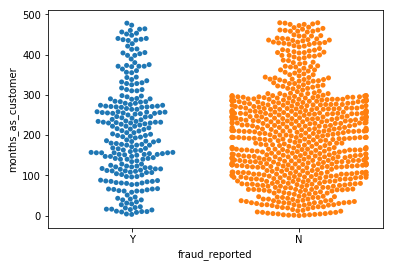

In [18]:
sns.swarmplot(x = 'fraud_reported', y = 'months_as_customer', data = dataset)

### Upon reviewing, I can see that there is a lesser fraud reported after 300 months as customer

## Age v/s Fraud reported

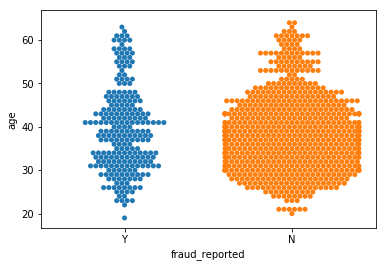

In [19]:
sns.swarmplot(x = 'fraud_reported', y = 'age', data = dataset)

### There is higher number of fraud reported for the customers from the age 25 to 50 years

## Policy State v/s reported Fraud

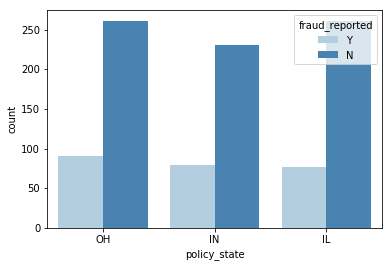

In [20]:
sns.countplot(x = 'policy_state',hue= 'fraud_reported',data =dataset,palette = 'Blues')

In [21]:
cross = pd.crosstab(index = dataset['policy_state'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
policy_state,,,
IL,261,77,22.781065
IN,231,79,25.483871
OH,261,91,25.852273


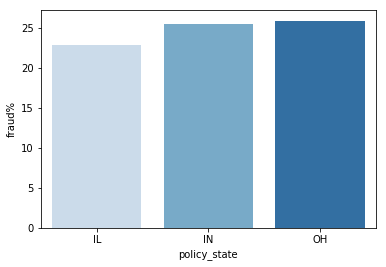

In [22]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### When we look at the number of frauded customer per state, we can see that Ohio is leading followed by Indiana and Illinois. 

### However, when we look at the proportion of frauded customers, we can see that both Ohio and Indiana has almost same proportion (25-26%), when compared to Illinois

## Policy CSL V/S Fraud reported

#### Combined single limits are a provision of an insurance policy that limits the coverage for all components of a claim to a single dollar amount. A combined single limit policy has a maximum dollar amount that covers any combination of injuries or property damage in an incident. A combined single limit can also be used to cover claims for more than one person in an incident. 

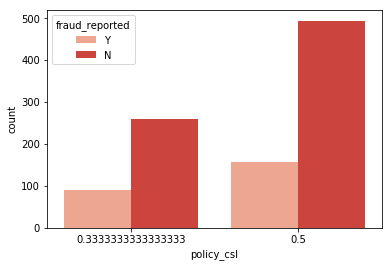

In [23]:
sns.countplot(hue = 'fraud_reported', x = 'policy_csl', data = dataset, palette = 'Reds')

In [24]:
cross = pd.crosstab(index = dataset['policy_csl'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
policy_csl,,,
0.333333,259,90,25.787966
0.500000,494,157,24.116743


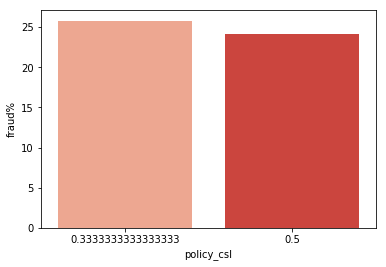

In [25]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### By looking at the above analysis, we can say that the higher number of fraud reported was for 0.5 CSL. However higher proportion of claims were considered as fraud for the 0.333 CSL

## Policy deductible v/s fraud reported

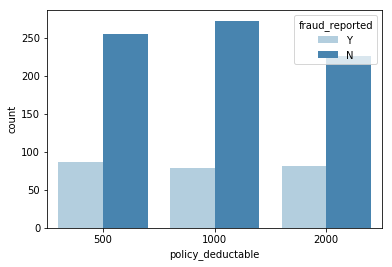

In [26]:
sns.countplot(hue = 'fraud_reported', x = 'policy_deductable', data = dataset, palette = 'Blues')

In [27]:
cross = pd.crosstab(index = dataset['policy_deductable'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
policy_deductable,,,
500,255,87,25.438596
1000,272,79,22.507123
2000,226,81,26.384365


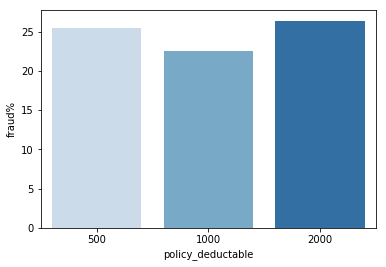

In [28]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis we can say that there were higher policies with '1000' USD as deductable and the higher percentage proportion of frauded customers were from 500 and 2000  USD  policy deductable charges.

## Policy Annual Premium V/S Fraud reported

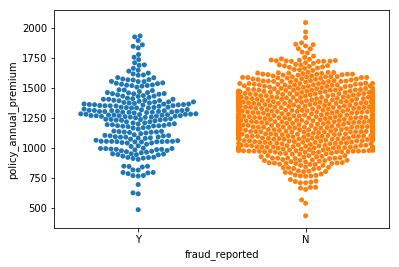

In [29]:
sns.swarmplot(x = 'fraud_reported', y = 'policy_annual_premium', data = dataset)

### We can see from the above plot that for the annual premium between 800 USD to 1600 USD we can see higher number of fraud case reported

In [30]:
dataset['umbrella_limit'] = dataset['umbrella_limit'].replace(-1000000,0)

### Umbrella Limit cannot be in negative values hence replaceing it with most frequent value

## Umbrella Limit V/S Fraud reported

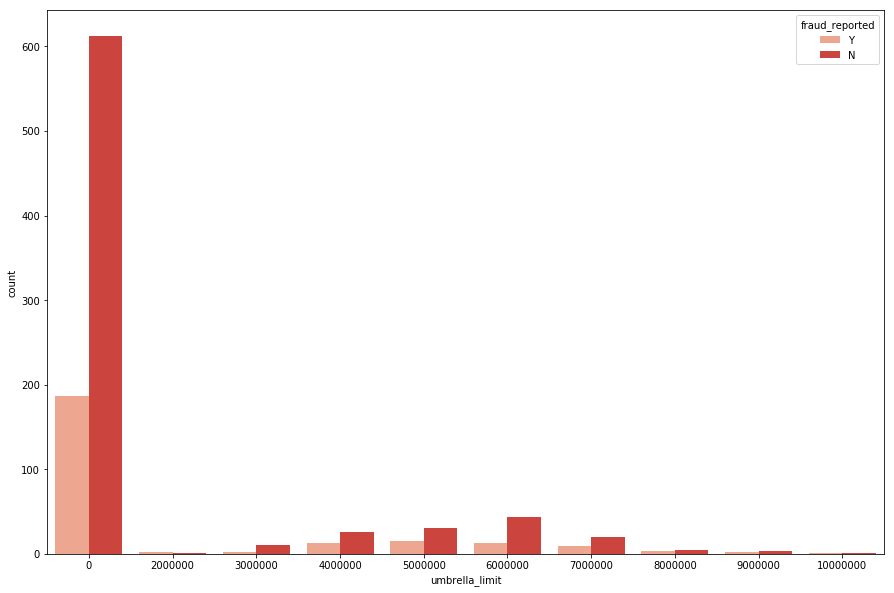

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(hue = 'fraud_reported', x = 'umbrella_limit', data = dataset, palette = 'Reds')

In [32]:
cross = pd.crosstab(index = dataset['umbrella_limit'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
umbrella_limit,,,
0,612,187,23.404255
2000000,1,2,66.666667
3000000,10,2,16.666667
4000000,26,13,33.333333
5000000,31,15,32.608696
6000000,44,13,22.807018
7000000,20,9,31.034483
8000000,5,3,37.500000
9000000,3,2,40.000000


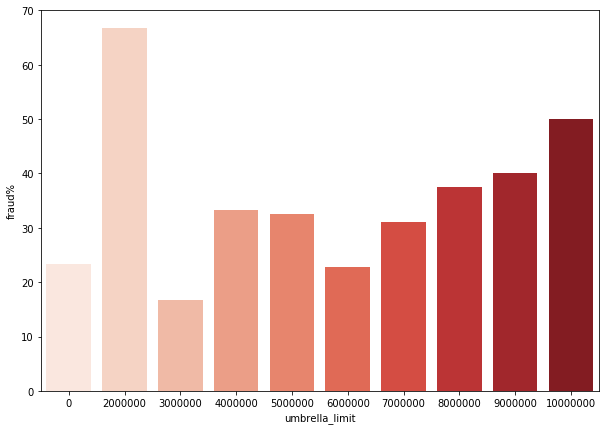

In [33]:
plt.figure(figsize = (10,7))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### Although there were larger number of fraud detected for the policies with 0 umbrella limit, policies with 2 million limit had higher proportion of frauds deteccted

## insured sex V/S Fraud detected

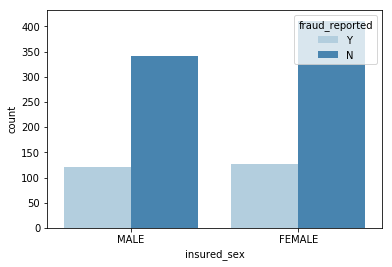

In [34]:
sns.countplot(hue = 'fraud_reported', x = 'insured_sex', data = dataset, palette = 'Blues')

In [35]:
cross = pd.crosstab(index = dataset['insured_sex'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
insured_sex,,,
FEMALE,411,126,23.463687
MALE,342,121,26.133909


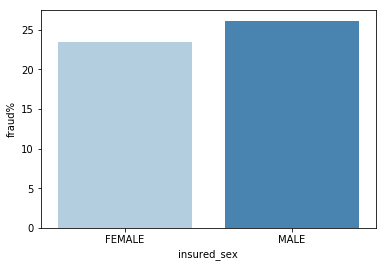

In [36]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### Upon reviewing, I can see that the highest number of fraud was detected for female customers, however, the higher proportion of customers reported fraud were male 

## insured_education_level v/s Fraud detected

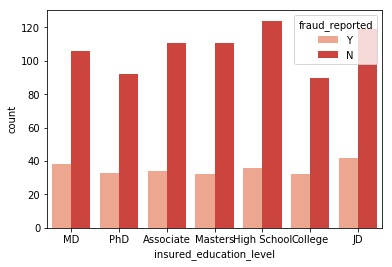

In [37]:
sns.countplot(hue = 'fraud_reported', x = 'insured_education_level', data = dataset, palette = 'Reds')

In [38]:
cross = pd.crosstab(index = dataset['insured_education_level'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
insured_education_level,,,
Associate,111,34,23.448276
College,90,32,26.229508
High School,124,36,22.500000
JD,119,42,26.086957
MD,106,38,26.388889
Masters,111,32,22.377622
PhD,92,33,26.400000


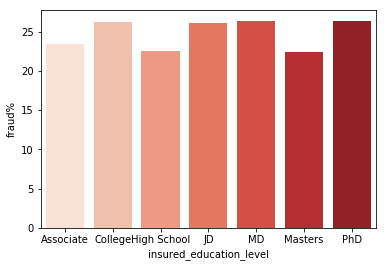

In [39]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### Although there was highest number of frauded cases were found for JD, when we look at the proportion, we can say that the fraud was detected at equal proportions of 26% for educatoin level of PhD, MD and Associate

## insured_occupation V/S Fraud Detected

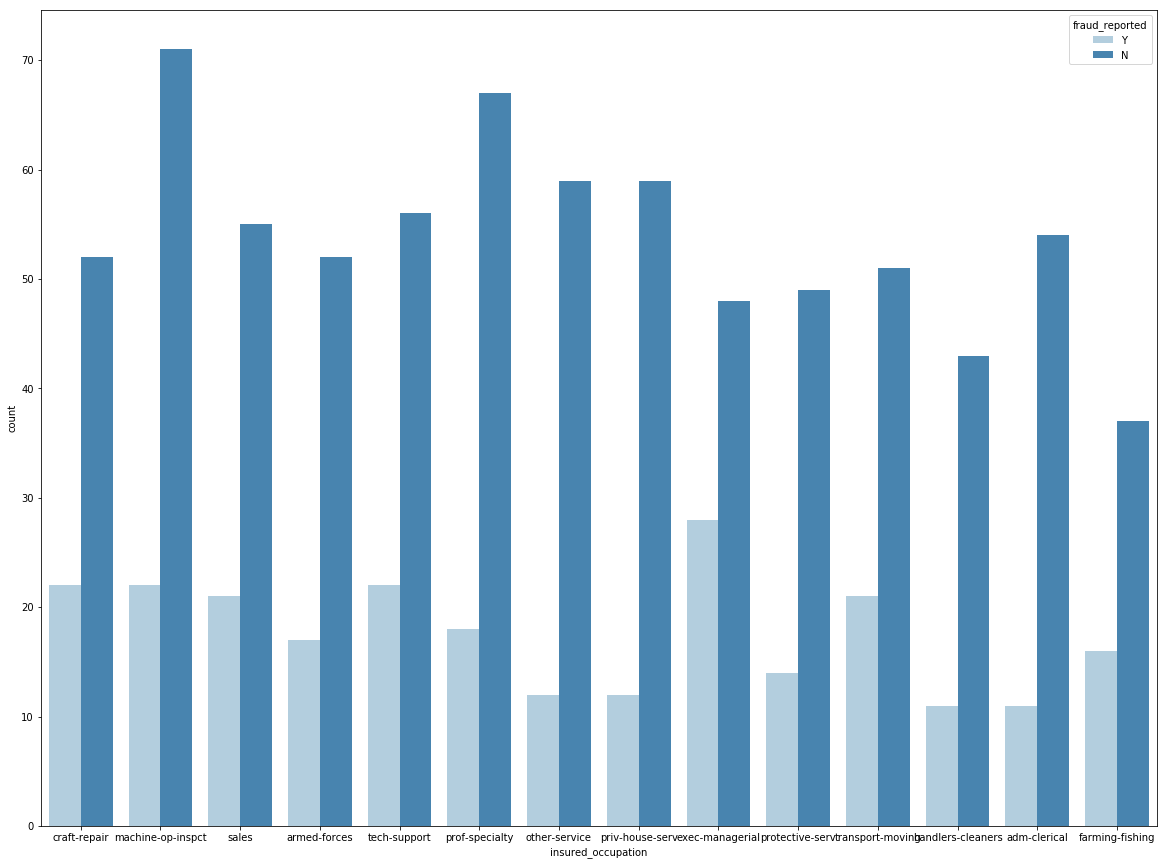

In [40]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'insured_occupation', data = dataset, palette = 'Blues')

In [41]:
cross = pd.crosstab(index = dataset['insured_occupation'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
insured_occupation,,,
adm-clerical,54,11,16.923077
armed-forces,52,17,24.637681
craft-repair,52,22,29.729730
exec-managerial,48,28,36.842105
farming-fishing,37,16,30.188679
handlers-cleaners,43,11,20.370370
machine-op-inspct,71,22,23.655914
other-service,59,12,16.901408
priv-house-serv,59,12,16.901408


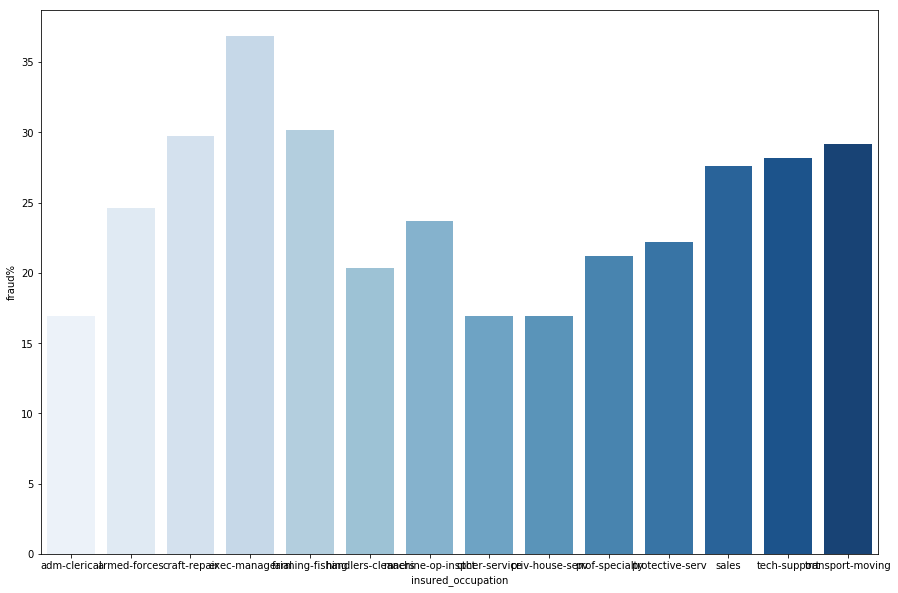

In [42]:
plt.figure(figsize = (15,10))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### Upon reviewing, I can see that, Executive managerial profession related customers recorded highest fraud rates with a proportion of 37%

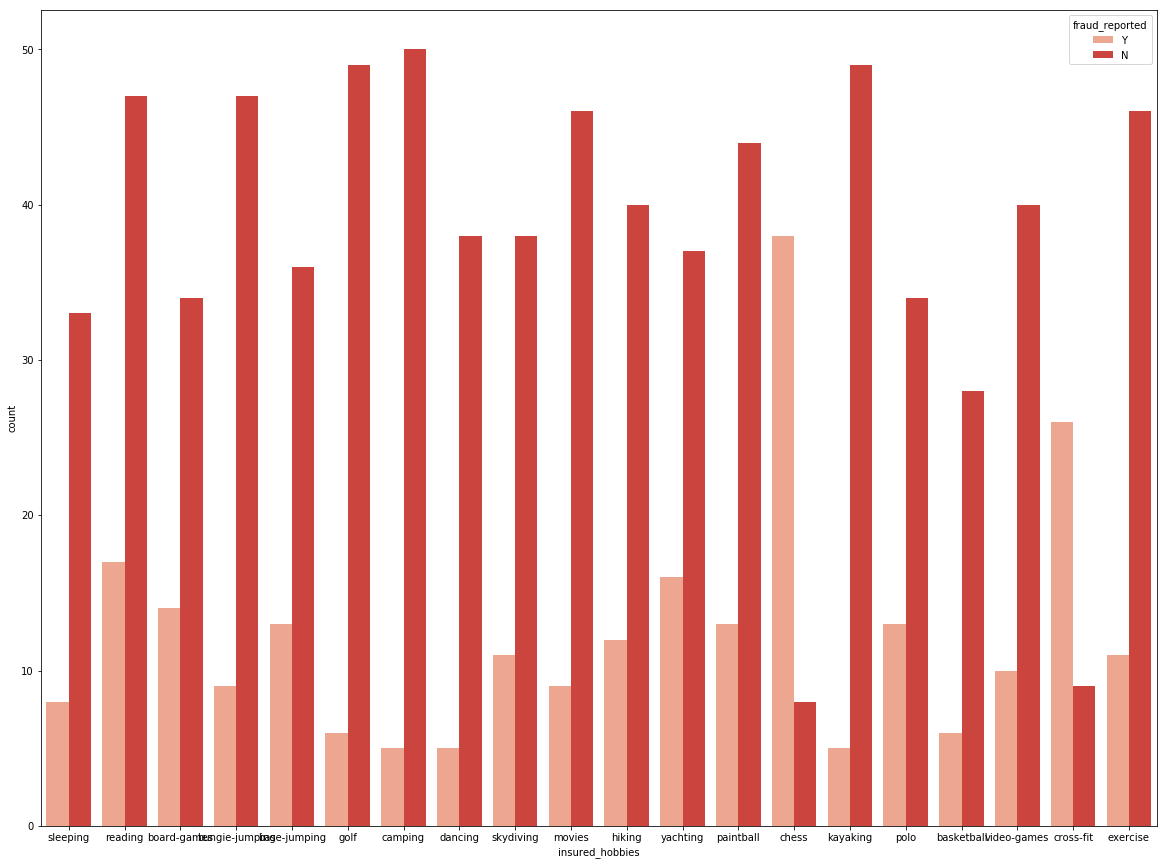

In [43]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'insured_hobbies', data = dataset, palette = 'Reds')

In [44]:
cross = pd.crosstab(index = dataset['insured_hobbies'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
insured_hobbies,,,
base-jumping,36,13,26.530612
basketball,28,6,17.647059
board-games,34,14,29.166667
bungie-jumping,47,9,16.071429
camping,50,5,9.090909
chess,8,38,82.608696
cross-fit,9,26,74.285714
dancing,38,5,11.627907
exercise,46,11,19.298246


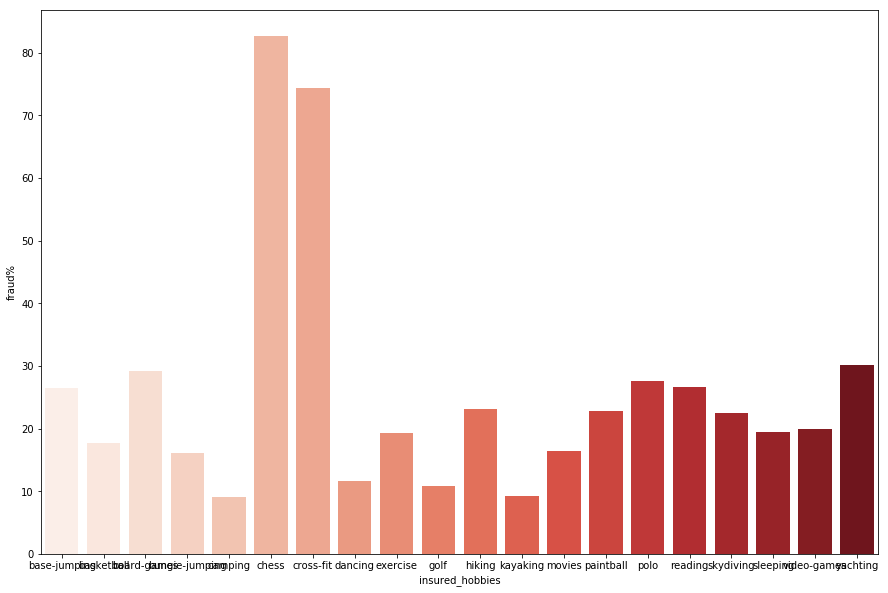

In [45]:
plt.figure(figsize = (15,10))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### From the above analysis, I can say that insurers with the hobby as chess and cross-fit had higher rates of fraud detected. the proportion was whooping 83% and 75% respectively

## Insured Relationship v/s Fraud reported

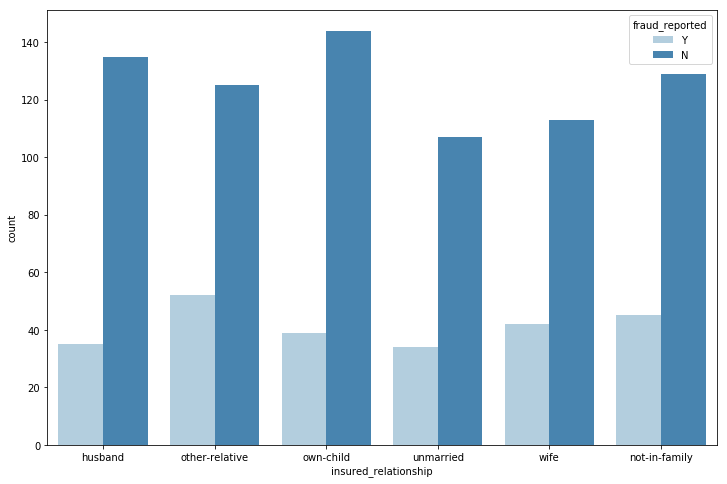

In [46]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'insured_relationship', data = dataset, palette = 'Blues')

In [47]:
cross = pd.crosstab(index = dataset['insured_relationship'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
insured_relationship,,,
husband,135,35,20.588235
not-in-family,129,45,25.862069
other-relative,125,52,29.378531
own-child,144,39,21.311475
unmarried,107,34,24.113475
wife,113,42,27.096774


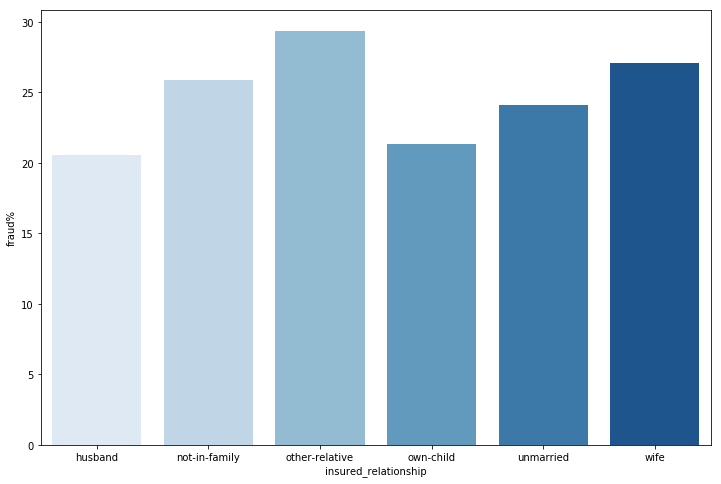

In [48]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis we can say that the the relationship 'other-relative' is repored as higher fraud rate with the proportion of ~29%

## capital-gains vs Fraud detected

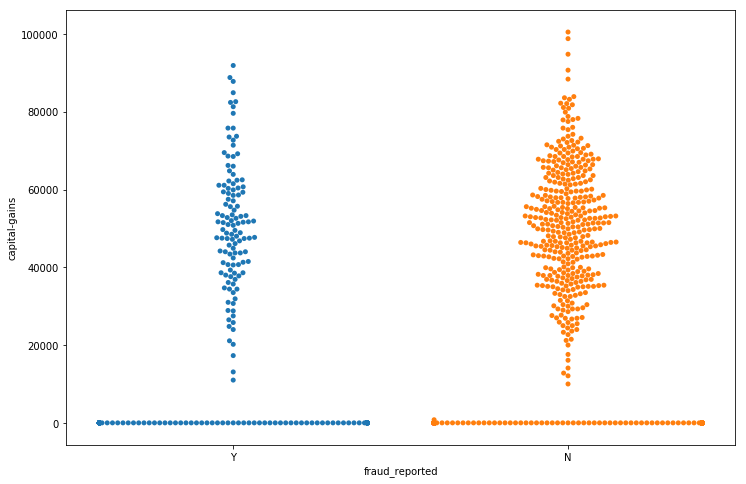

In [49]:
plt.figure(figsize = (12,8))
sns.swarmplot(y = 'capital-gains', x = 'fraud_reported', data = dataset)

### We can say that the capital gains 0 and ranging from 40000 to 60000 has higher  frauds reported

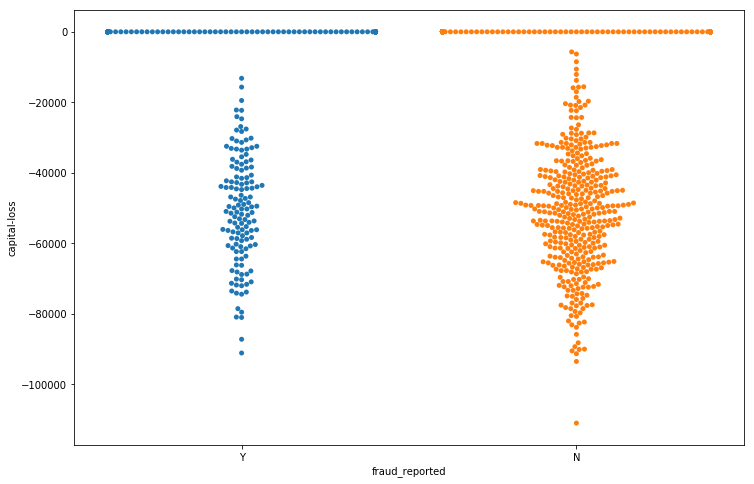

In [50]:
plt.figure(figsize = (12,8))
sns.swarmplot(y = 'capital-loss', x = 'fraud_reported', data = dataset)

### We can say that the capital loss 0 and ranging from 25000 to 60000 has higher  frauds reported

## Incident type v/s fraud reported

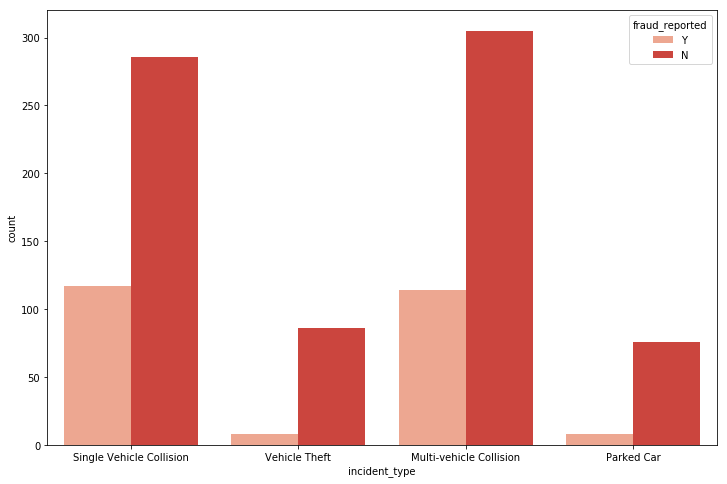

In [51]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'incident_type', data = dataset, palette = 'Reds')

In [52]:
cross = pd.crosstab(index = dataset['incident_type'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
incident_type,,,
Multi-vehicle Collision,305,114,27.207637
Parked Car,76,8,9.523810
Single Vehicle Collision,286,117,29.032258
Vehicle Theft,86,8,8.510638


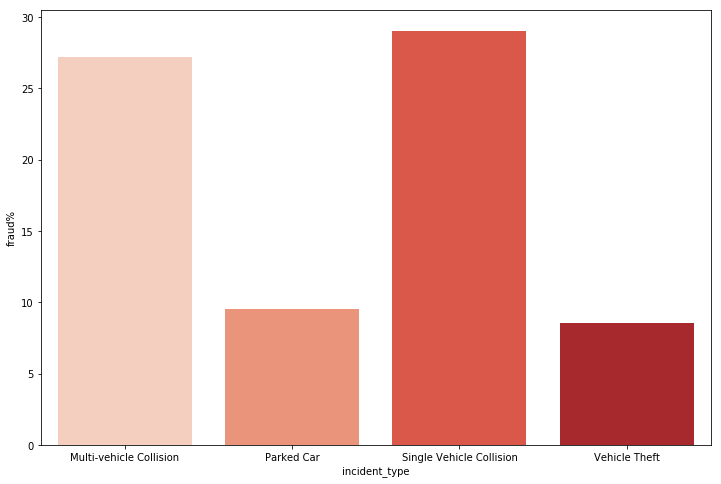

In [53]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### From the above analysis, I say that the the multi-vehicle collision and single vehicle collision contributed to the highest proportion of fraud detected. The proportions are 27 and 29% respectively.

## Collision type v/s fraud reported

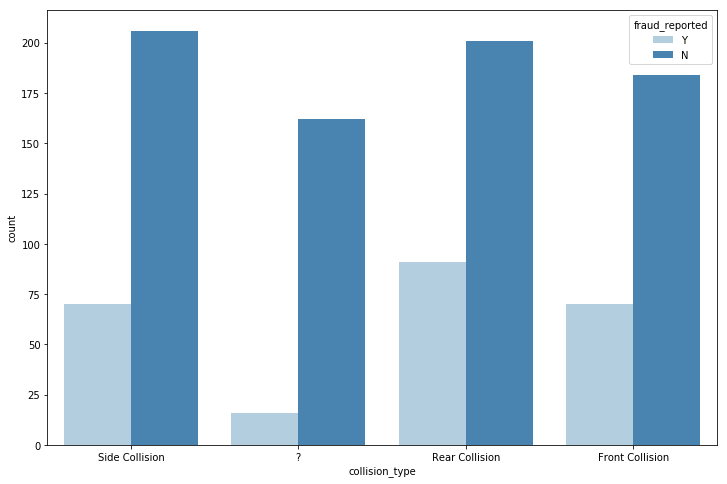

In [54]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'collision_type', data = dataset, palette = 'Blues')

In [55]:
dataset['collision_type'] = np.where(dataset['collision_type']=='?','unknown',dataset['collision_type'])

In [56]:
cross = pd.crosstab(index = dataset['collision_type'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
collision_type,,,
Front Collision,184,70,27.559055
Rear Collision,201,91,31.164384
Side Collision,206,70,25.362319
unknown,162,16,8.988764


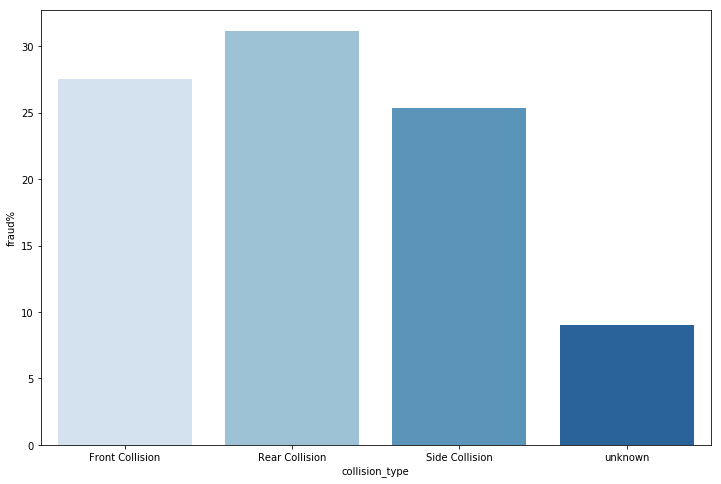

In [57]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### I can see from the above analysis that rear and side collision was reported fraud more number of times, however, when we look at proportion front collision and rear collision has the highest proportion 28 and 31 percent respectively

## Incident severity V/S Fraud reported

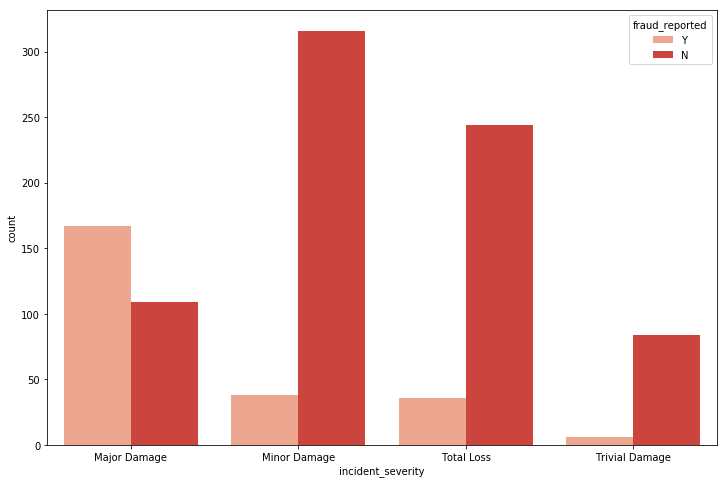

In [58]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'incident_severity', data = dataset, palette = 'Reds')

### From the above figure we can say that the Major Damage has the highest number of fraud report including the highest Proportion

## Authorities contacted V/s Fraud Reported

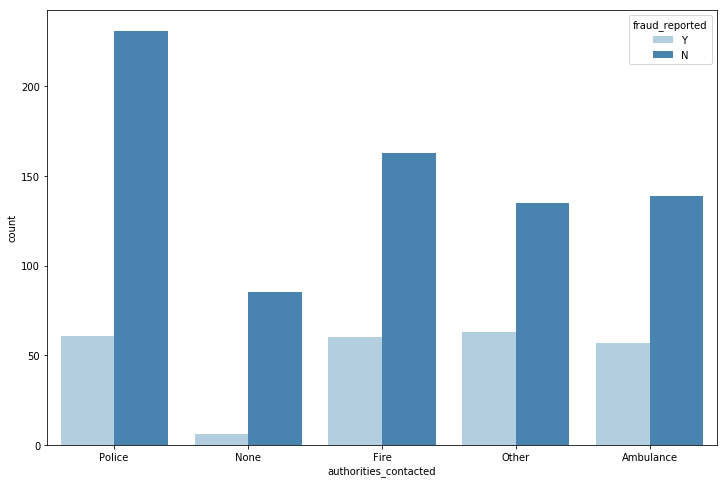

In [59]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'authorities_contacted', data = dataset, palette = 'Blues')

In [60]:
cross = pd.crosstab(index = dataset['authorities_contacted'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
authorities_contacted,,,
Ambulance,139,57,29.081633
Fire,163,60,26.905830
None,85,6,6.593407
Other,135,63,31.818182
Police,231,61,20.890411


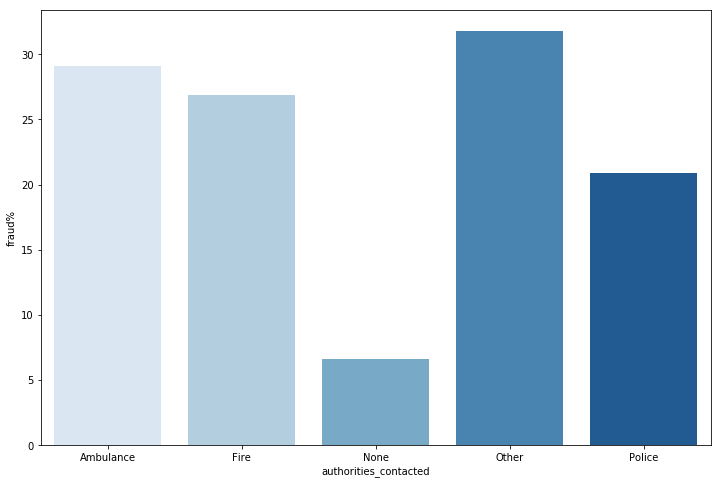

In [61]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis, I can say that the people who contacted other authorities recorded higher proportion of fraud followed by Ambuance, Fire and Police. Here No authorities contacted recorded lowest Fraud

## Incident State V/S Fraud Reported

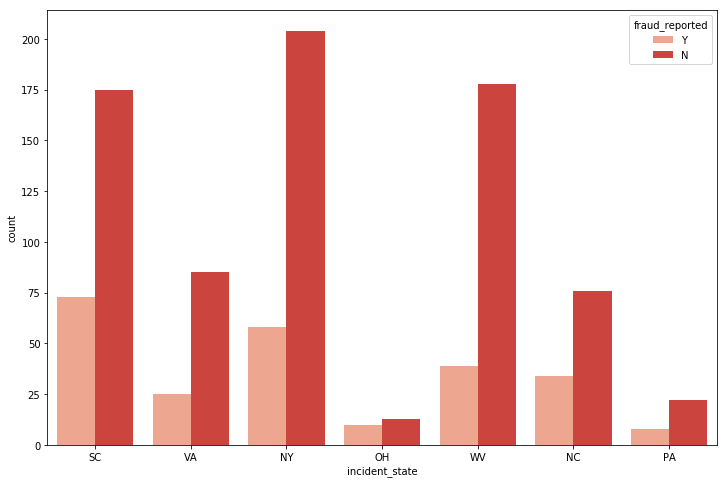

In [62]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'incident_state', data = dataset, palette = 'Reds')

In [63]:
cross = pd.crosstab(index = dataset['incident_state'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
incident_state,,,
NC,76,34,30.909091
NY,204,58,22.137405
OH,13,10,43.478261
PA,22,8,26.666667
SC,175,73,29.435484
VA,85,25,22.727273
WV,178,39,17.972350


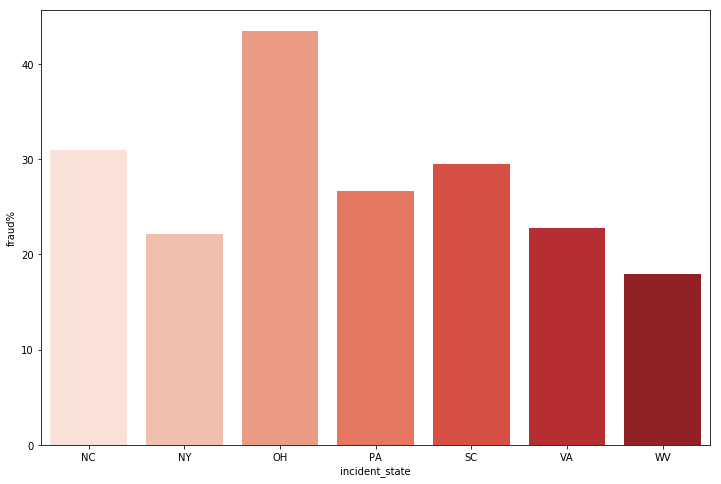

In [64]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### Although there were higher number of frauds reported for the state South Carolina, the highest proportion of frauds reported were for the state Ohio with 43.5%

## incident city v/s fraud reported

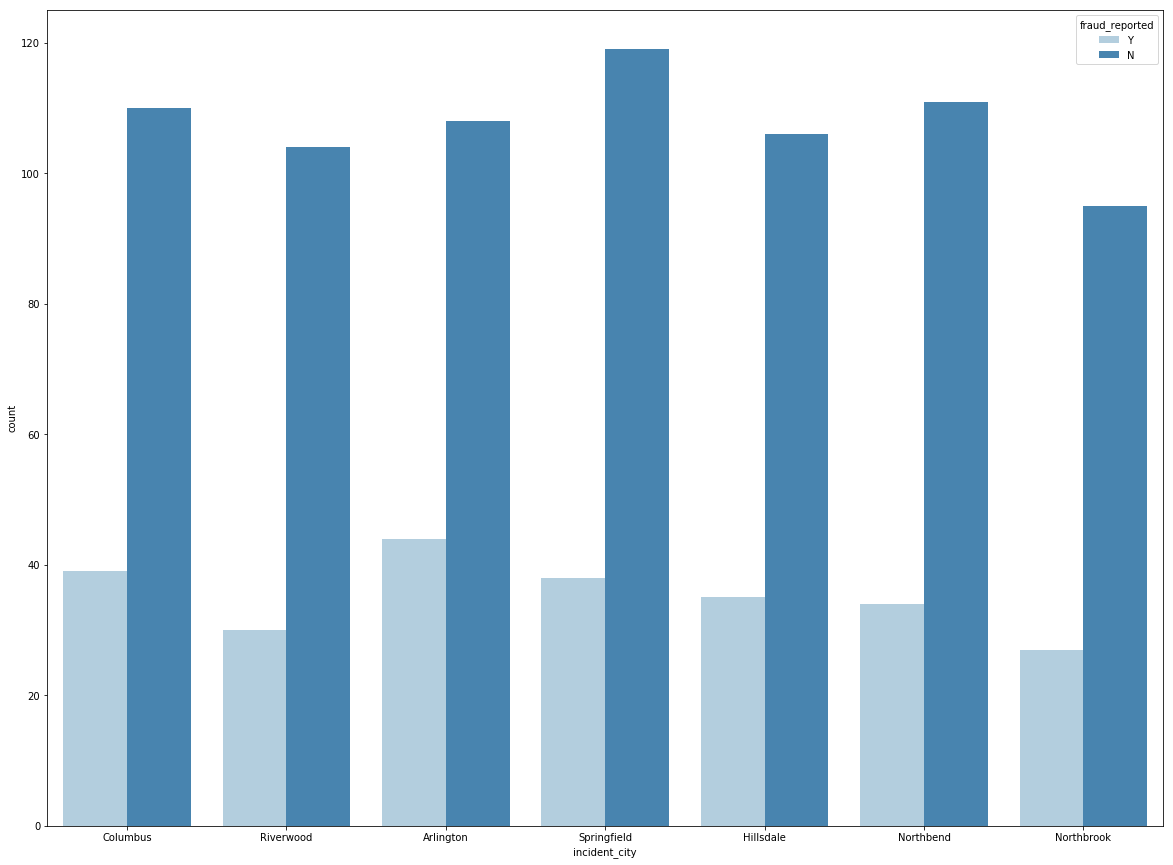

In [65]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'incident_city', data = dataset, palette = 'Blues')

In [66]:
cross = pd.crosstab(index = dataset['incident_city'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
incident_city,,,
Arlington,108,44,28.947368
Columbus,110,39,26.174497
Hillsdale,106,35,24.822695
Northbend,111,34,23.448276
Northbrook,95,27,22.131148
Riverwood,104,30,22.388060
Springfield,119,38,24.203822


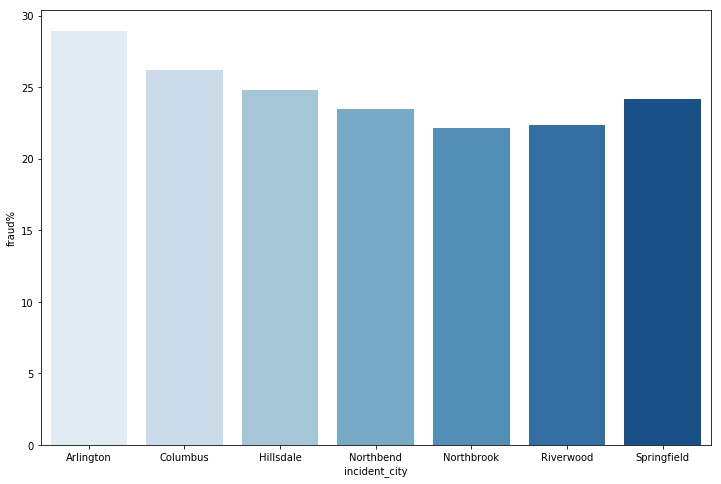

In [67]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis, I can see that the city Arlington reported highest proportion of fraud cases, followd by Springfield

## incident_hour_of_the_day V/S Fraud reported

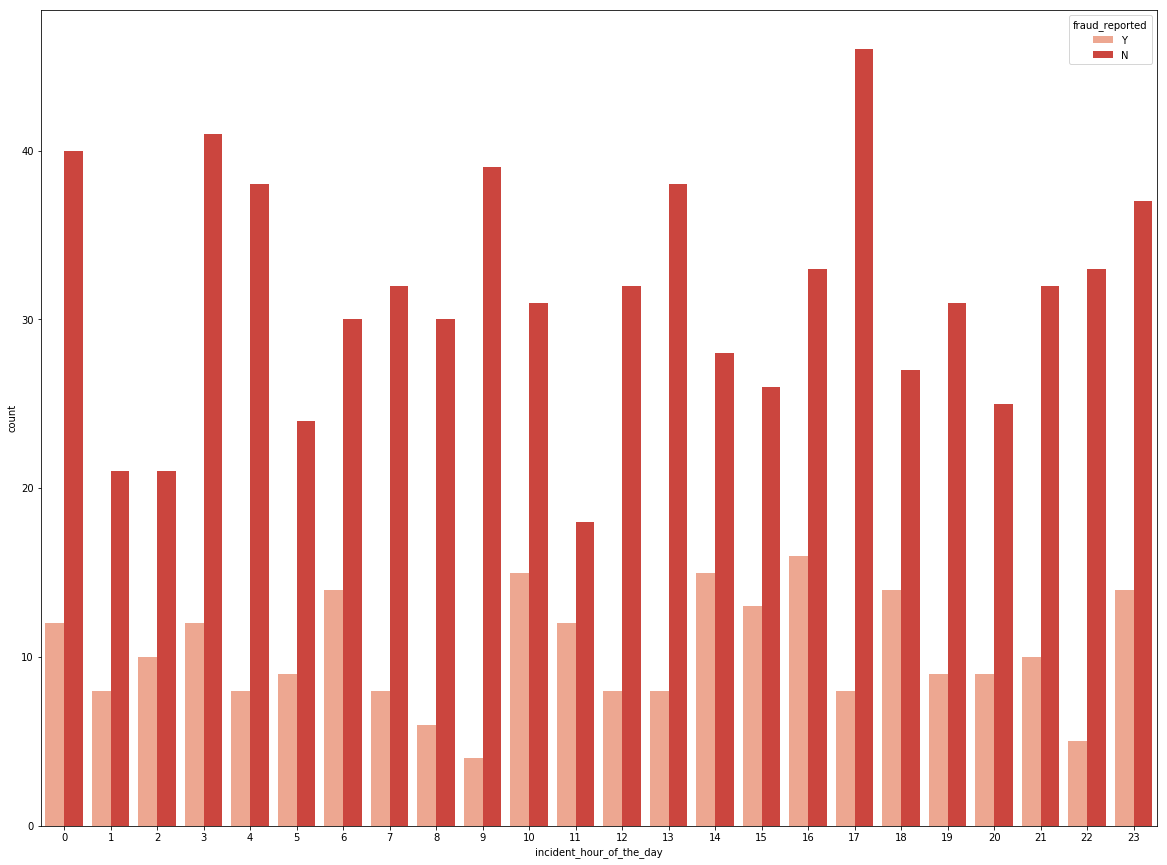

In [68]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'incident_hour_of_the_day', data = dataset, palette = 'Reds')

In [69]:
cross = pd.crosstab(index = dataset['incident_hour_of_the_day'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
incident_hour_of_the_day,,,
0,40,12,23.076923
1,21,8,27.586207
2,21,10,32.258065
3,41,12,22.641509
4,38,8,17.391304
5,24,9,27.272727
6,30,14,31.818182
7,32,8,20.000000
8,30,6,16.666667


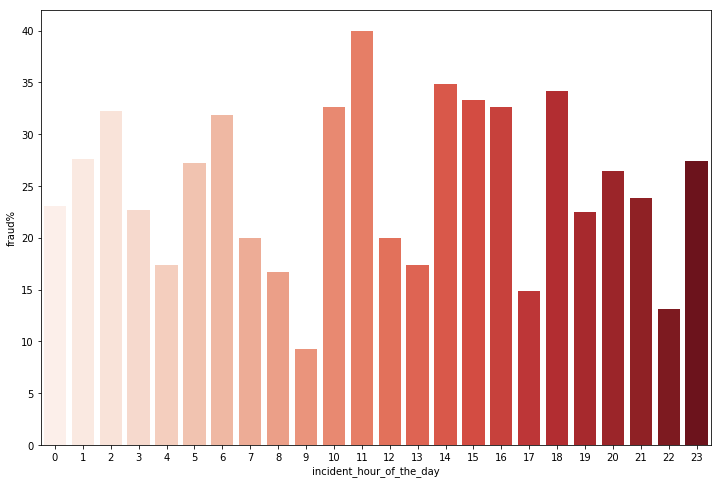

In [70]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### From the above analysis, I can say that the accident reported at 11th hour of the day had highest proportion of fraud reported

## number_of_vehicles_involved V/S Fraud reported

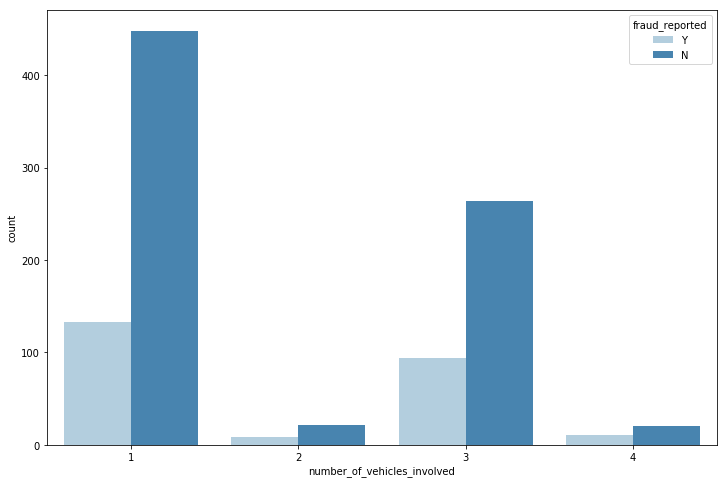

In [71]:
plt.figure(figsize = (12,8))
sns.countplot(hue = 'fraud_reported', x = 'number_of_vehicles_involved', data = dataset, palette = 'Blues')

In [72]:
cross = pd.crosstab(index = dataset['number_of_vehicles_involved'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
number_of_vehicles_involved,,,
1,448,133,22.891566
2,21,9,30.000000
3,264,94,26.256983
4,20,11,35.483871


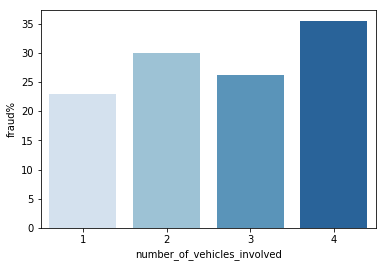

In [73]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### Although the accidents involving 1 vehicle had highest number of claims, when we look at the proportion  of the frauded cases, I can say that the claims involving 4 vehicles had highest proportion of fraud deteted

## property_damage V/S fraud_reported

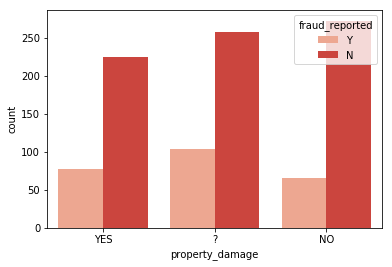

In [74]:
sns.countplot(hue = 'fraud_reported', x = 'property_damage', data = dataset, palette = 'Reds')

In [75]:
dataset['property_damage'] = np.where(dataset['property_damage']=='?','unknown', dataset['property_damage'])

In [76]:
cross = pd.crosstab(index = dataset['property_damage'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
property_damage,,,
NO,272,66,19.526627
YES,224,78,25.827815
unknown,257,103,28.611111


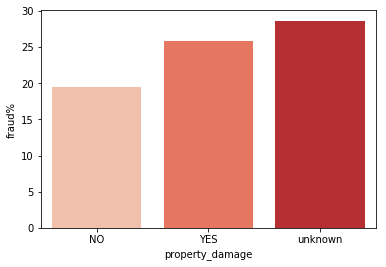

In [77]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### From the above figure, I can say that the unknown category for the property damage reported highest and greater proportion of fraud when compared to other categories

## Bodily injuries V/S Fraud detected

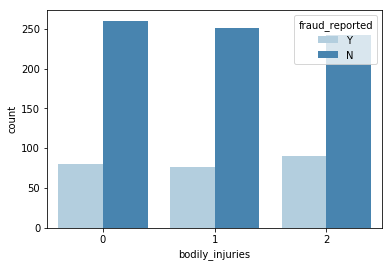

In [78]:
sns.countplot(hue = 'fraud_reported', x = 'bodily_injuries', data = dataset, palette = 'Blues')

In [79]:
cross = pd.crosstab(index = dataset['bodily_injuries'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
bodily_injuries,,,
0,260,80,23.529412
1,251,77,23.475610
2,242,90,27.108434


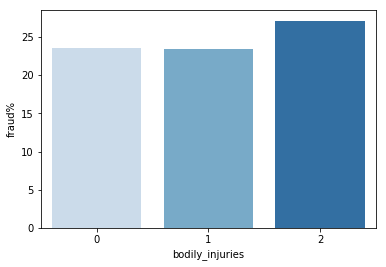

In [80]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### We can see from the above analysis that the claims with 2 bodily injuries recorded highest number of fraud and the proportion is also higher when compared to others. 27% fraud 

## witnesses V/s Fraud_reported

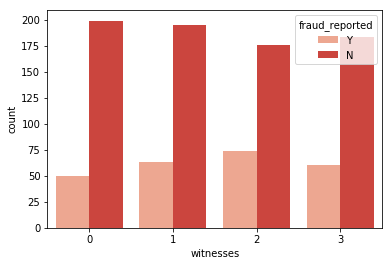

In [81]:
sns.countplot(hue = 'fraud_reported', x = 'witnesses', data = dataset, palette = 'Reds')

In [82]:
cross = pd.crosstab(index = dataset['witnesses'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
witnesses,,,
0,199,50,20.080321
1,195,63,24.418605
2,176,74,29.600000
3,183,60,24.691358


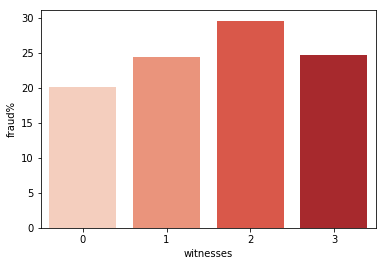

In [83]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### from the above graps we can say that the claims which had 2 witnesses recorded highest number of fraud and the proprtion of frauded cases were 30%

## police_report_available V/s fraud reported

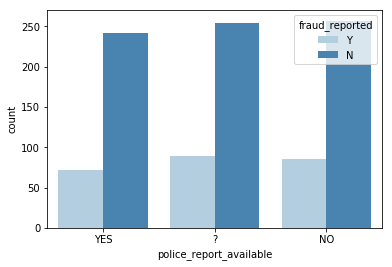

In [84]:
sns.countplot(hue = 'fraud_reported', x = 'police_report_available', data = dataset, palette = 'Blues')

### Police report status '?', can be considered as the policereport unavailable

In [85]:
dataset['police_report_available'] = np.where(dataset['police_report_available']=='?','NO', dataset['police_report_available'])

In [86]:
cross = pd.crosstab(index = dataset['police_report_available'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
police_report_available,,,
NO,511,175,25.510204
YES,242,72,22.929936


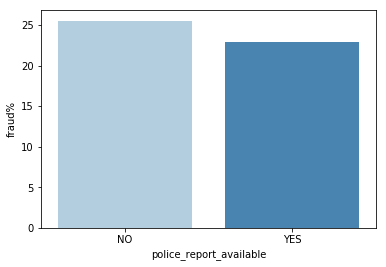

In [87]:
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above figure I can say that the claims without police report has highest fraud reported with the proportion of 26%

## total_claim_amount V/S Fraud reported

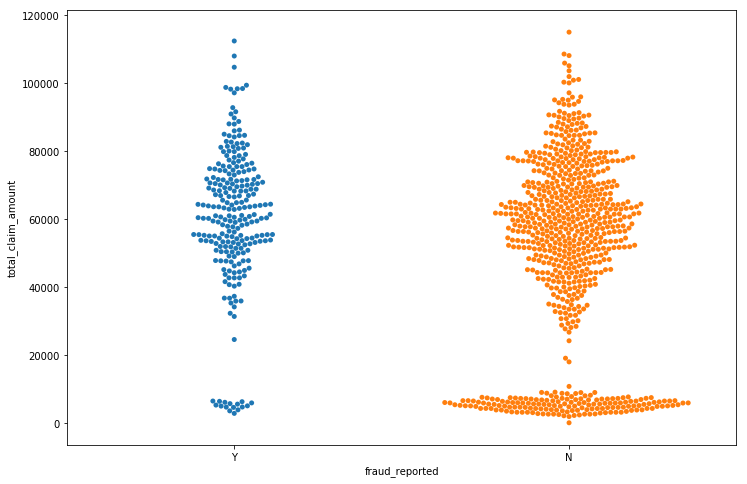

In [88]:
plt.figure(figsize = (12,8))
sns.swarmplot(y = 'total_claim_amount', x = 'fraud_reported', data = dataset)

### From the range 50000 USD to 80000 USD we can see higher number of frauded cases recorded

## injury_claim V/s Fraud reported

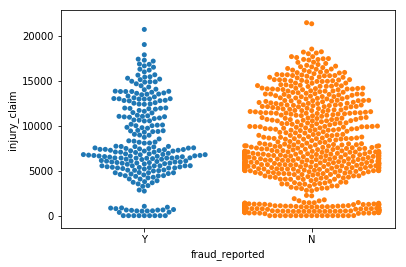

In [89]:
sns.swarmplot(y = 'injury_claim', x = 'fraud_reported', data = dataset)

### From the above swarm distribution, I can see that the highest fraud recorded was for the claim amount of 4500 to 7500 USD Approx for injury claims

## property_claim V/s Fraud reported

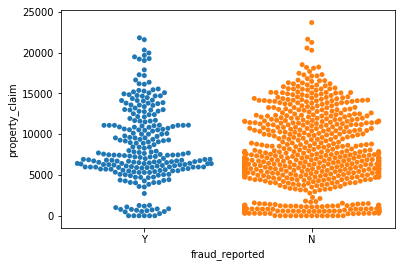

In [90]:
sns.swarmplot(y = 'property_claim', x = 'fraud_reported', data = dataset)

### From the above swarm distribution, I can see that the highest fraud recorded was for the claim amount of 4000 to 11000 USD Approx for property claims

## vehicle_claim V/s Fraud reported

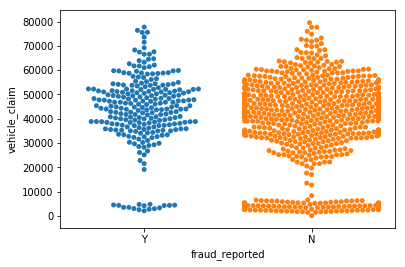

In [91]:
sns.swarmplot(y = 'vehicle_claim', x = 'fraud_reported', data = dataset)

### From the above swarm distribution, I can see that the highest fraud recorded was for the claim amount of 30000 to 60000 USD Approx for vehicle claims

## auto_make V/s Fraud reported

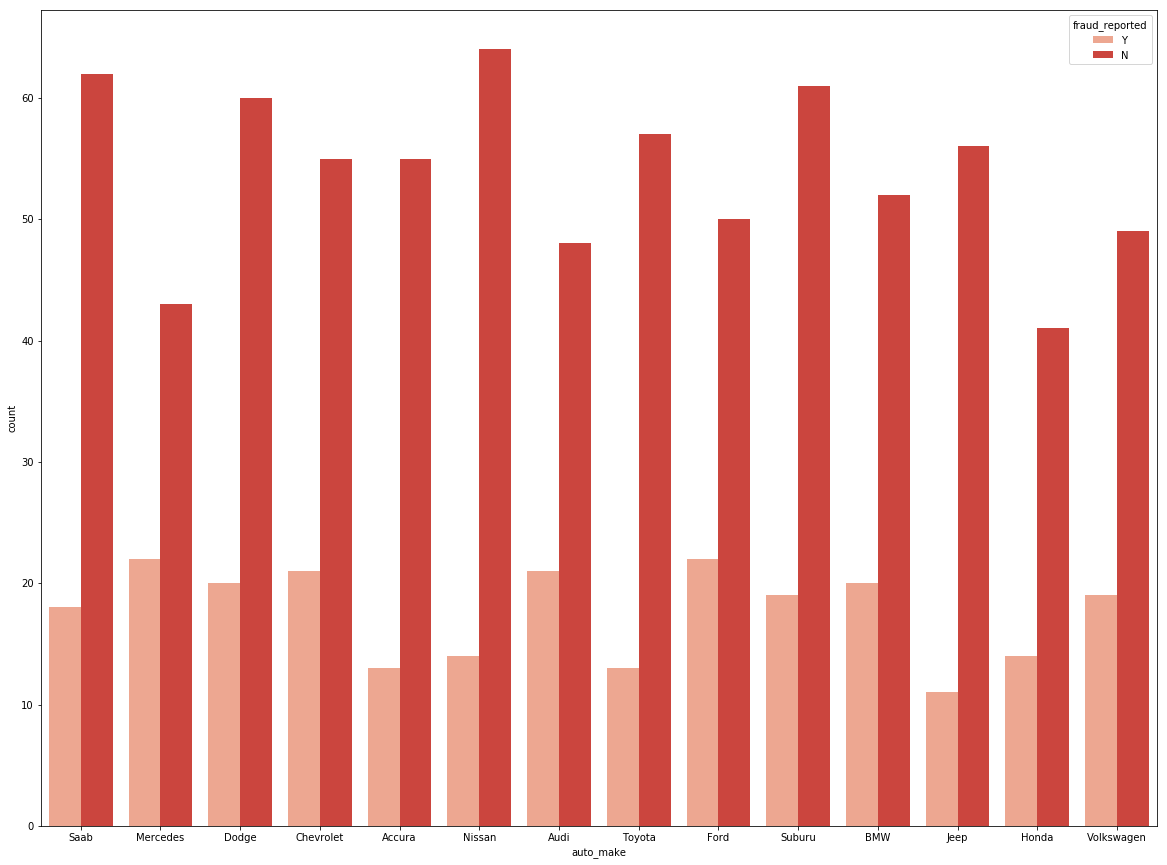

In [92]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'auto_make', data = dataset, palette = 'Reds')

In [93]:
cross = pd.crosstab(index = dataset['auto_make'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
auto_make,,,
Accura,55,13,19.117647
Audi,48,21,30.434783
BMW,52,20,27.777778
Chevrolet,55,21,27.631579
Dodge,60,20,25.000000
Ford,50,22,30.555556
Honda,41,14,25.454545
Jeep,56,11,16.417910
Mercedes,43,22,33.846154


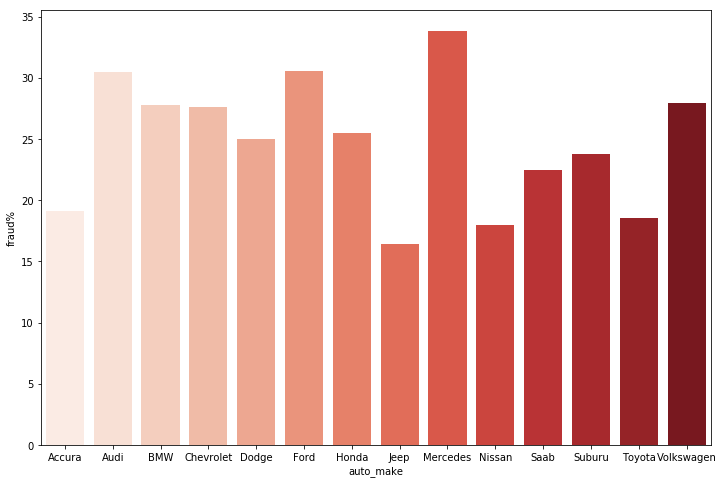

In [94]:
plt.figure(figsize = (12,8))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### From the above analysis we can say that the claims related car brands like Mercedes, Audi and Ford has recorded highest proportion of frauded claims, while Jeep and Toyota were the lowest

## auto_model V/s Fraud Recorded

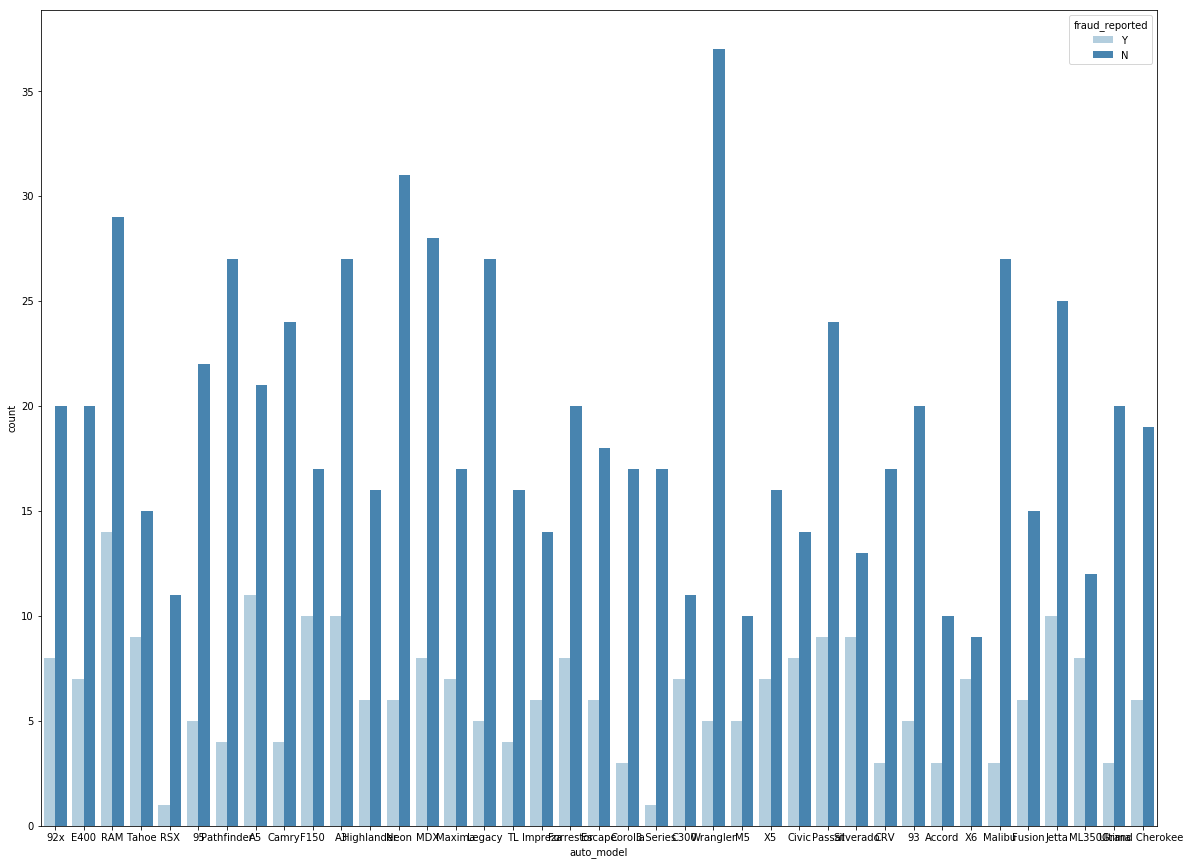

In [95]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'auto_model', data = dataset, palette = 'Blues')

In [96]:
cross = pd.crosstab(index = dataset['auto_model'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
auto_model,,,
3 Series,17,1,5.555556
92x,20,8,28.571429
93,20,5,20.000000
95,22,5,18.518519
A3,27,10,27.027027
A5,21,11,34.375000
Accord,10,3,23.076923
C300,11,7,38.888889
CRV,17,3,15.000000


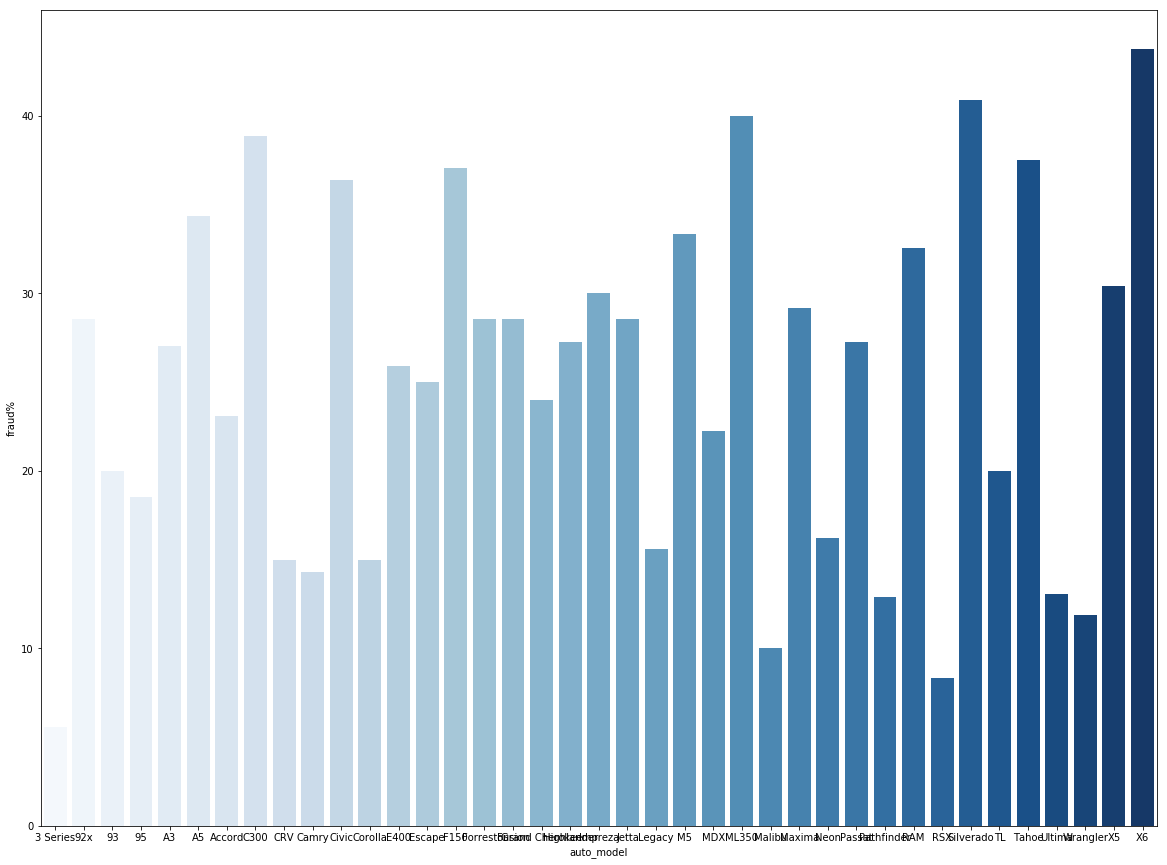

In [97]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### Although the brands like Mercedes, Audi and Ford were highest contributors for the fraud recordings, here we can see that the model x6 from BMW was the highest contribution for the fraud recording.

## Auto year V/s fraud reported

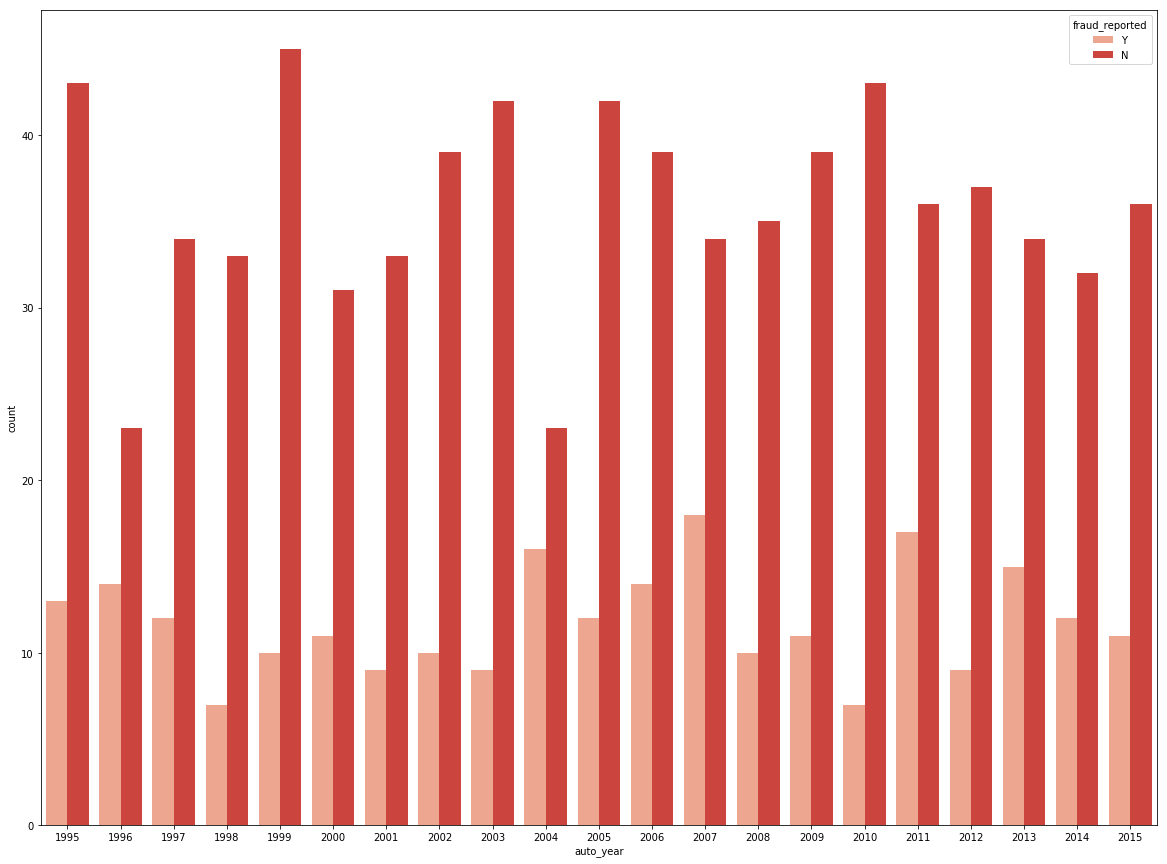

In [98]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'auto_year', data = dataset, palette = 'Reds')

In [99]:
cross = pd.crosstab(index = dataset['auto_year'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
auto_year,,,
1995,43,13,23.214286
1996,23,14,37.837838
1997,34,12,26.086957
1998,33,7,17.500000
1999,45,10,18.181818
2000,31,11,26.190476
2001,33,9,21.428571
2002,39,10,20.408163
2003,42,9,17.647059


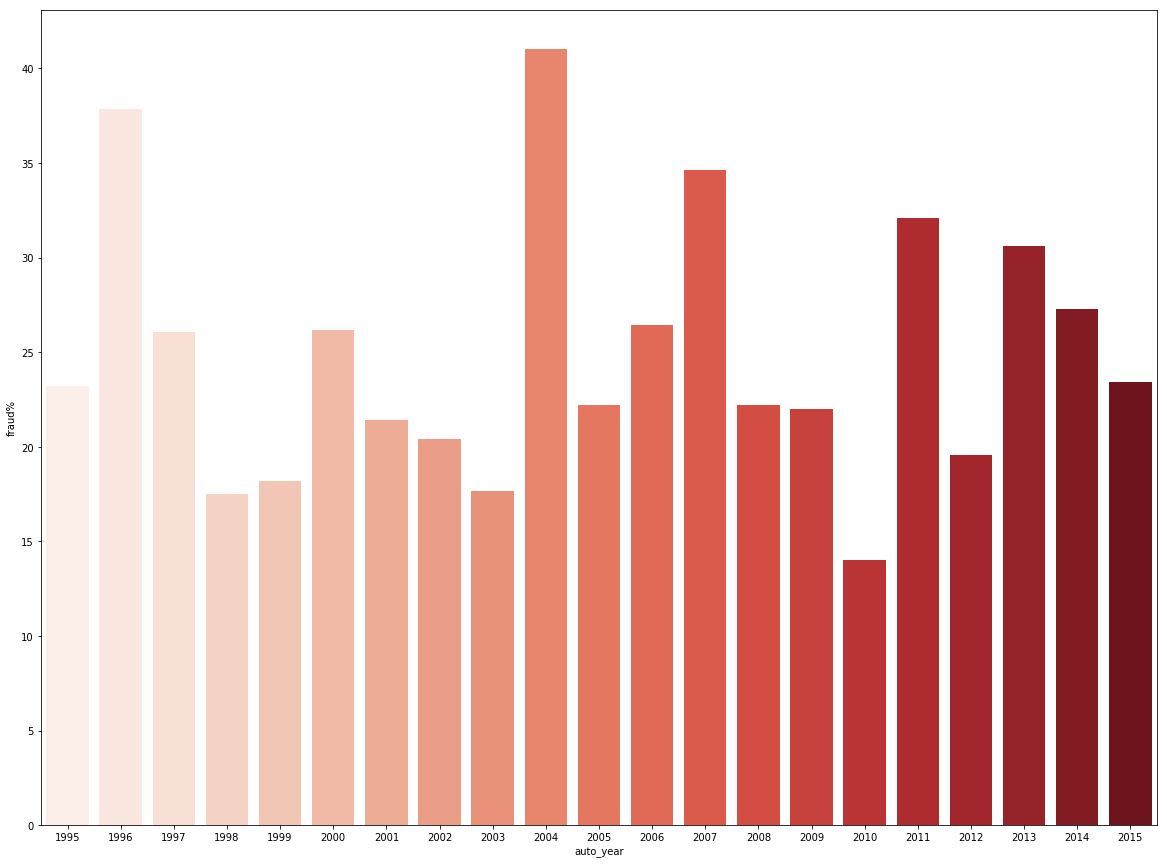

In [100]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### As per the previous analysis, I can say that the year 2004 and 1996 recorded the highest proportion of fradulent claims. i.e, 41% and 38% respectively

## bind_year V/s Fraud reported

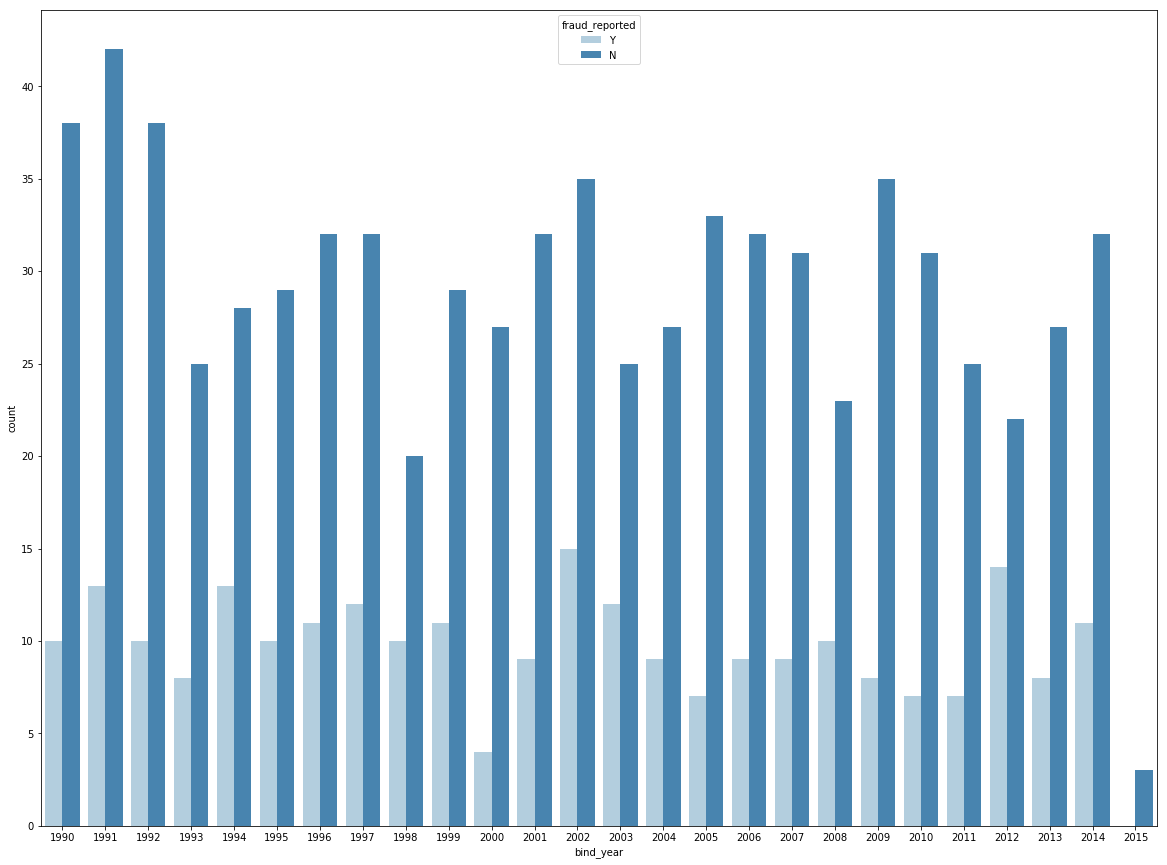

In [101]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'bind_year', data = dataset, palette = 'Blues')

In [102]:
cross = pd.crosstab(index = dataset['bind_year'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
bind_year,,,
1990,38,10,20.833333
1991,42,13,23.636364
1992,38,10,20.833333
1993,25,8,24.242424
1994,28,13,31.707317
1995,29,10,25.641026
1996,32,11,25.581395
1997,32,12,27.272727
1998,20,10,33.333333


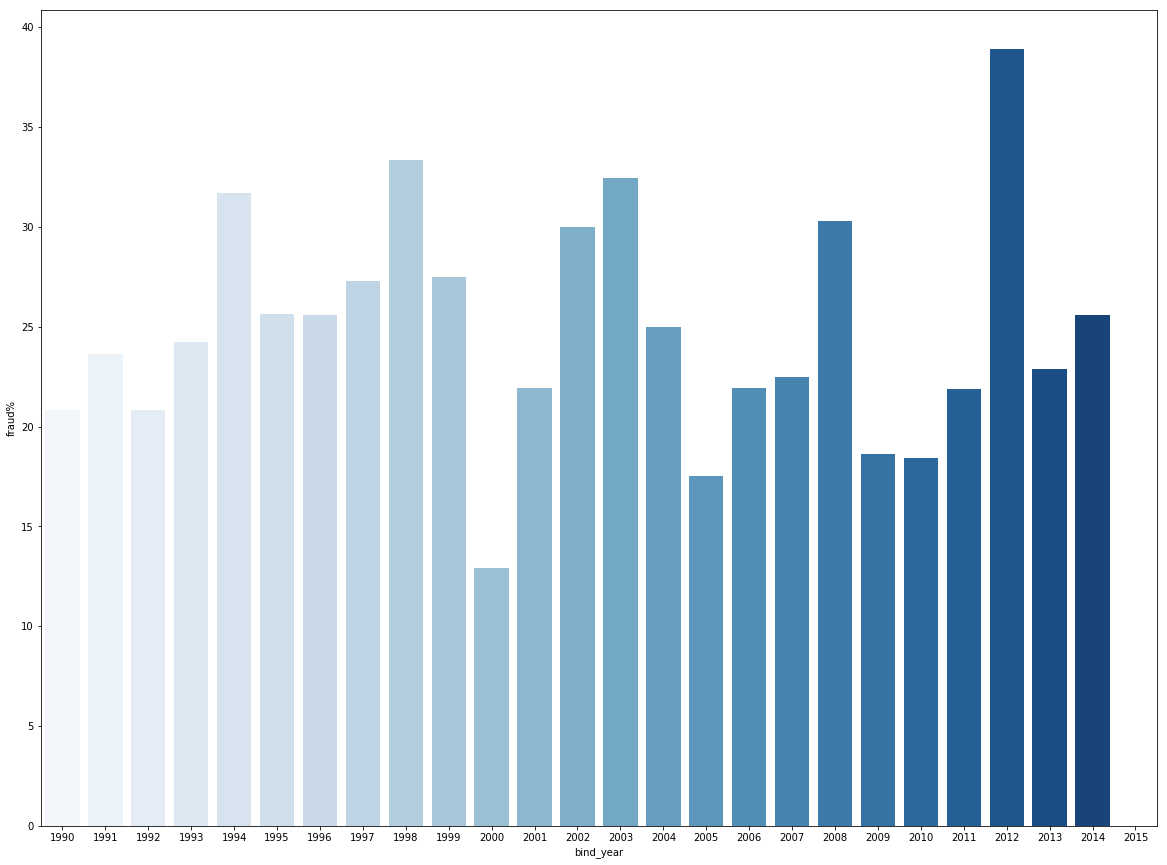

In [103]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis I can say that the highest number of fraud was reported in the year 2002, But when I look at the proportion, 2012 had the highest fraud detected which is close to 39%

## bind_month V/s Fraud detected

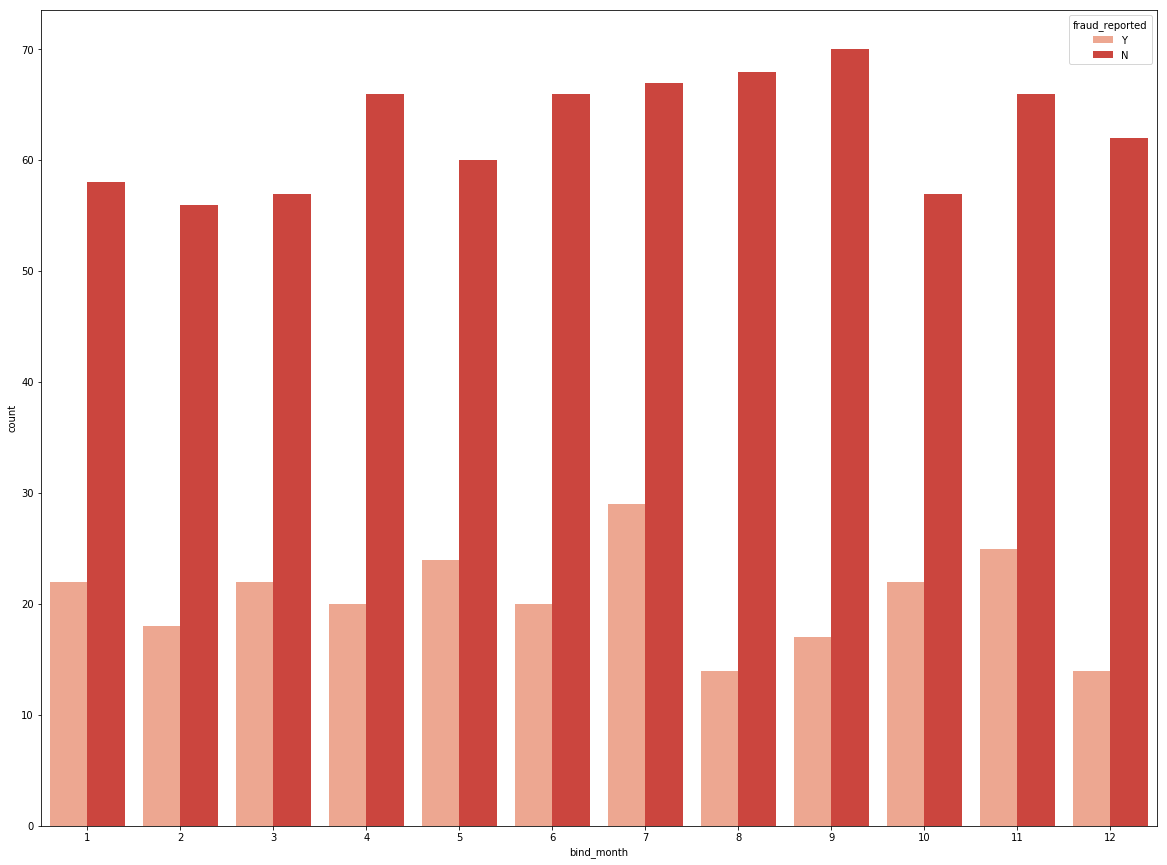

In [104]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'bind_month', data = dataset, palette = 'Reds')

In [105]:
cross = pd.crosstab(index = dataset['bind_month'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
bind_month,,,
1,58,22,27.500000
2,56,18,24.324324
3,57,22,27.848101
4,66,20,23.255814
5,60,24,28.571429
6,66,20,23.255814
7,67,29,30.208333
8,68,14,17.073171
9,70,17,19.540230


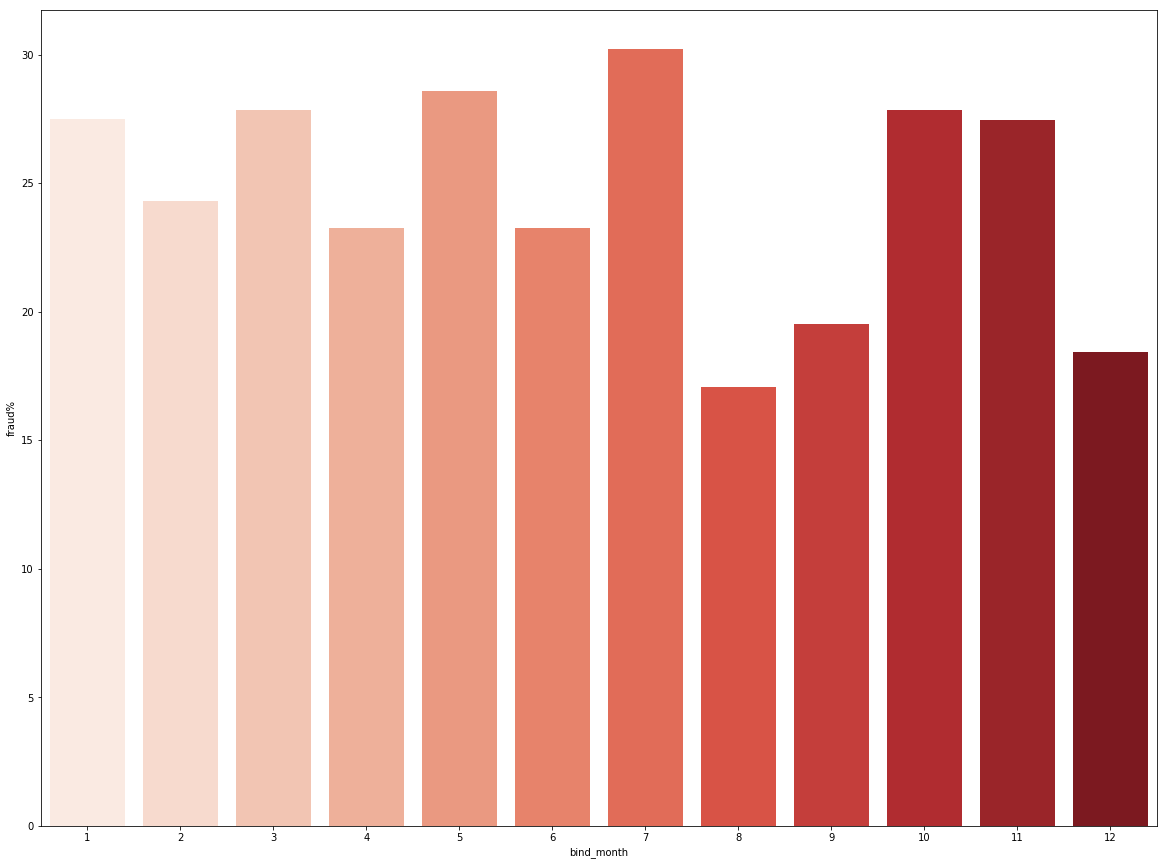

In [106]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Reds')

### I can see from the above analysis that the highest number of claims were on the month of June and on the same month there was high proportion of frauds detected, which is 30%

## Inc_year v/s Fraud detected

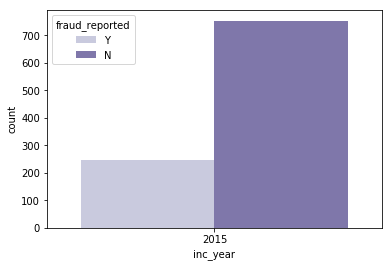

In [107]:
sns.countplot(hue = 'fraud_reported', x = 'inc_year', data = dataset, palette = 'Purples')

### Dropping the column as it only contains one value for all the rows and it will not have any effect on fraud detection

In [108]:
dataset  = dataset.drop(columns = 'inc_year')

## Inc_month v/s Fraud detected

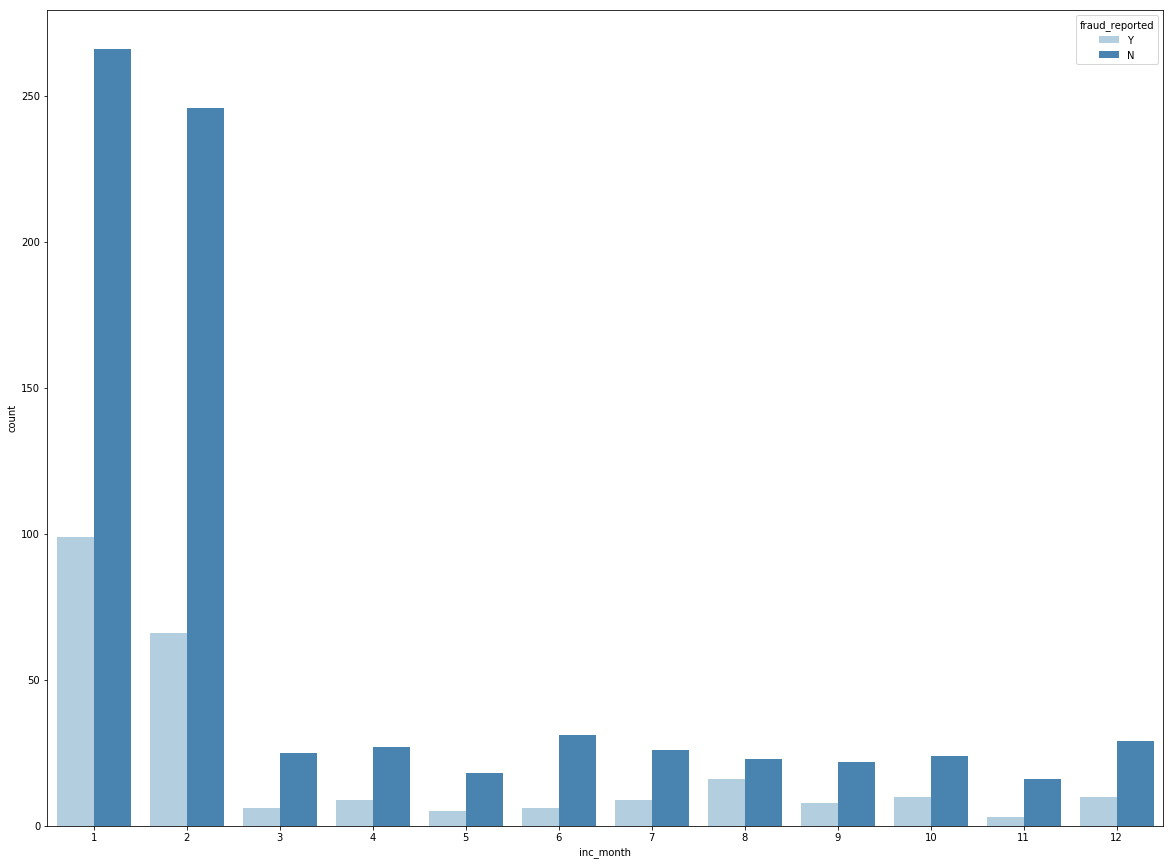

In [109]:
plt.figure(figsize = (20,15))
sns.countplot(hue = 'fraud_reported', x = 'inc_month', data = dataset, palette = 'Blues')

In [110]:
cross = pd.crosstab(index = dataset['inc_month'], columns = dataset['fraud_reported'])
cr = pd.DataFrame(cross)
cr['fraud%'] = (cr['Y']*100/(cr['Y']+cr['N']))
cr

fraud_reported,N,Y,fraud%
inc_month,,,
1,266,99,27.123288
2,246,66,21.153846
3,25,6,19.354839
4,27,9,25.000000
5,18,5,21.739130
6,31,6,16.216216
7,26,9,25.714286
8,23,16,41.025641
9,22,8,26.666667


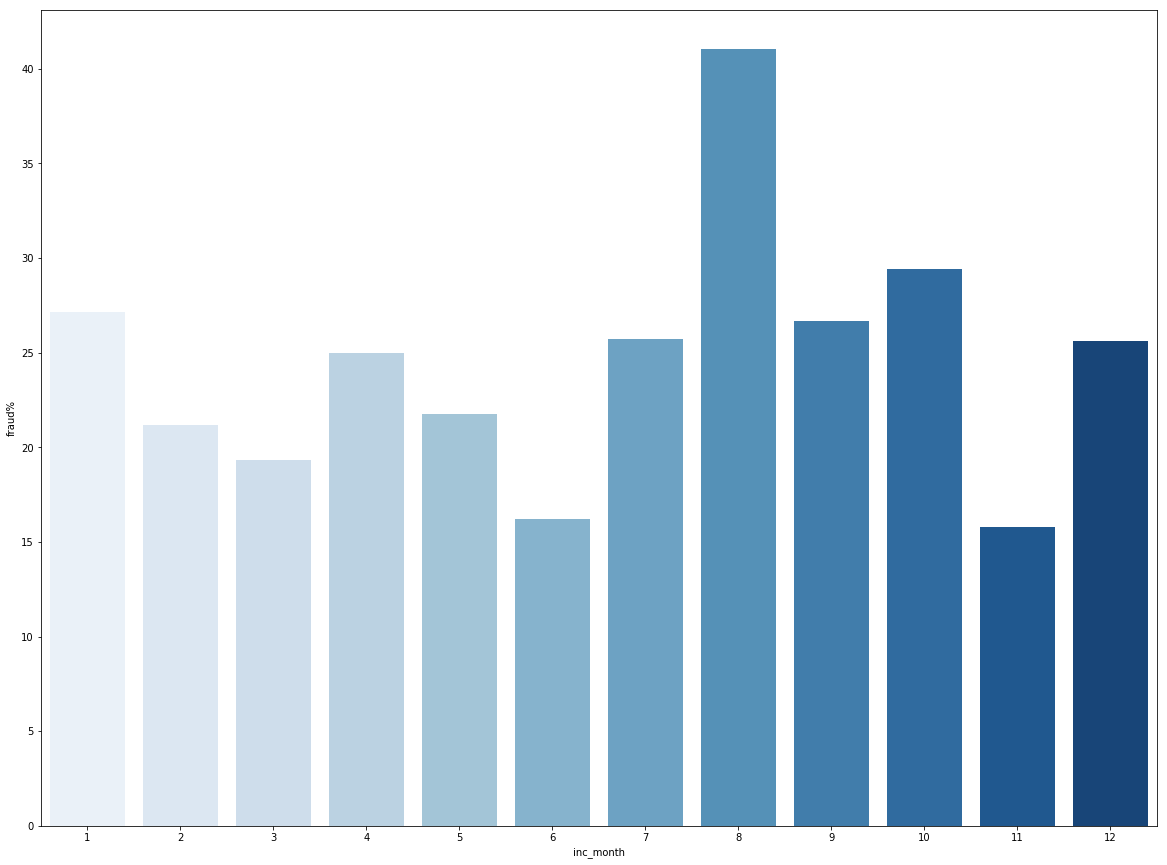

In [111]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['fraud%'], palette = 'Blues')

### From the above analysis we can say that the above incident months Jan and Feb had higher number of Frauds detected. however when we see the proportion of frauded claims, August had the highest proportion of 41%.

### Checking for data types

In [112]:
dataset.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

### Using the Ordinal Encoder to Encode the categorical variables and using Label Encoder to encode the Label

In [113]:
le = LabelEncoder()
en = le.fit_transform(dataset['fraud_reported'])
pd.Series(en)
dataset['fraud_reported'] = en

In [114]:
enc = OrdinalEncoder()
for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset[col] =enc.fit_transform(dataset[col].values.reshape(-1,1))

### Checking for data types again

In [115]:
dataset.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                

### The data has been encoded, let's proceed with checking the correlation of the dataset

In [116]:
corr = dataset.corr()
corr['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.087639
bind_day                       0.060643
umbrella_limit                 0.058390
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
inc_month                      0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
bind_year                     -0.000059


### I can see that the highest positive correlation with the target variable is for the column vehicle claim 0.17 and the highest negative correlation is for the incident severity with -0.4

#### Proceeding with heat map visualization to check the multi collenearity

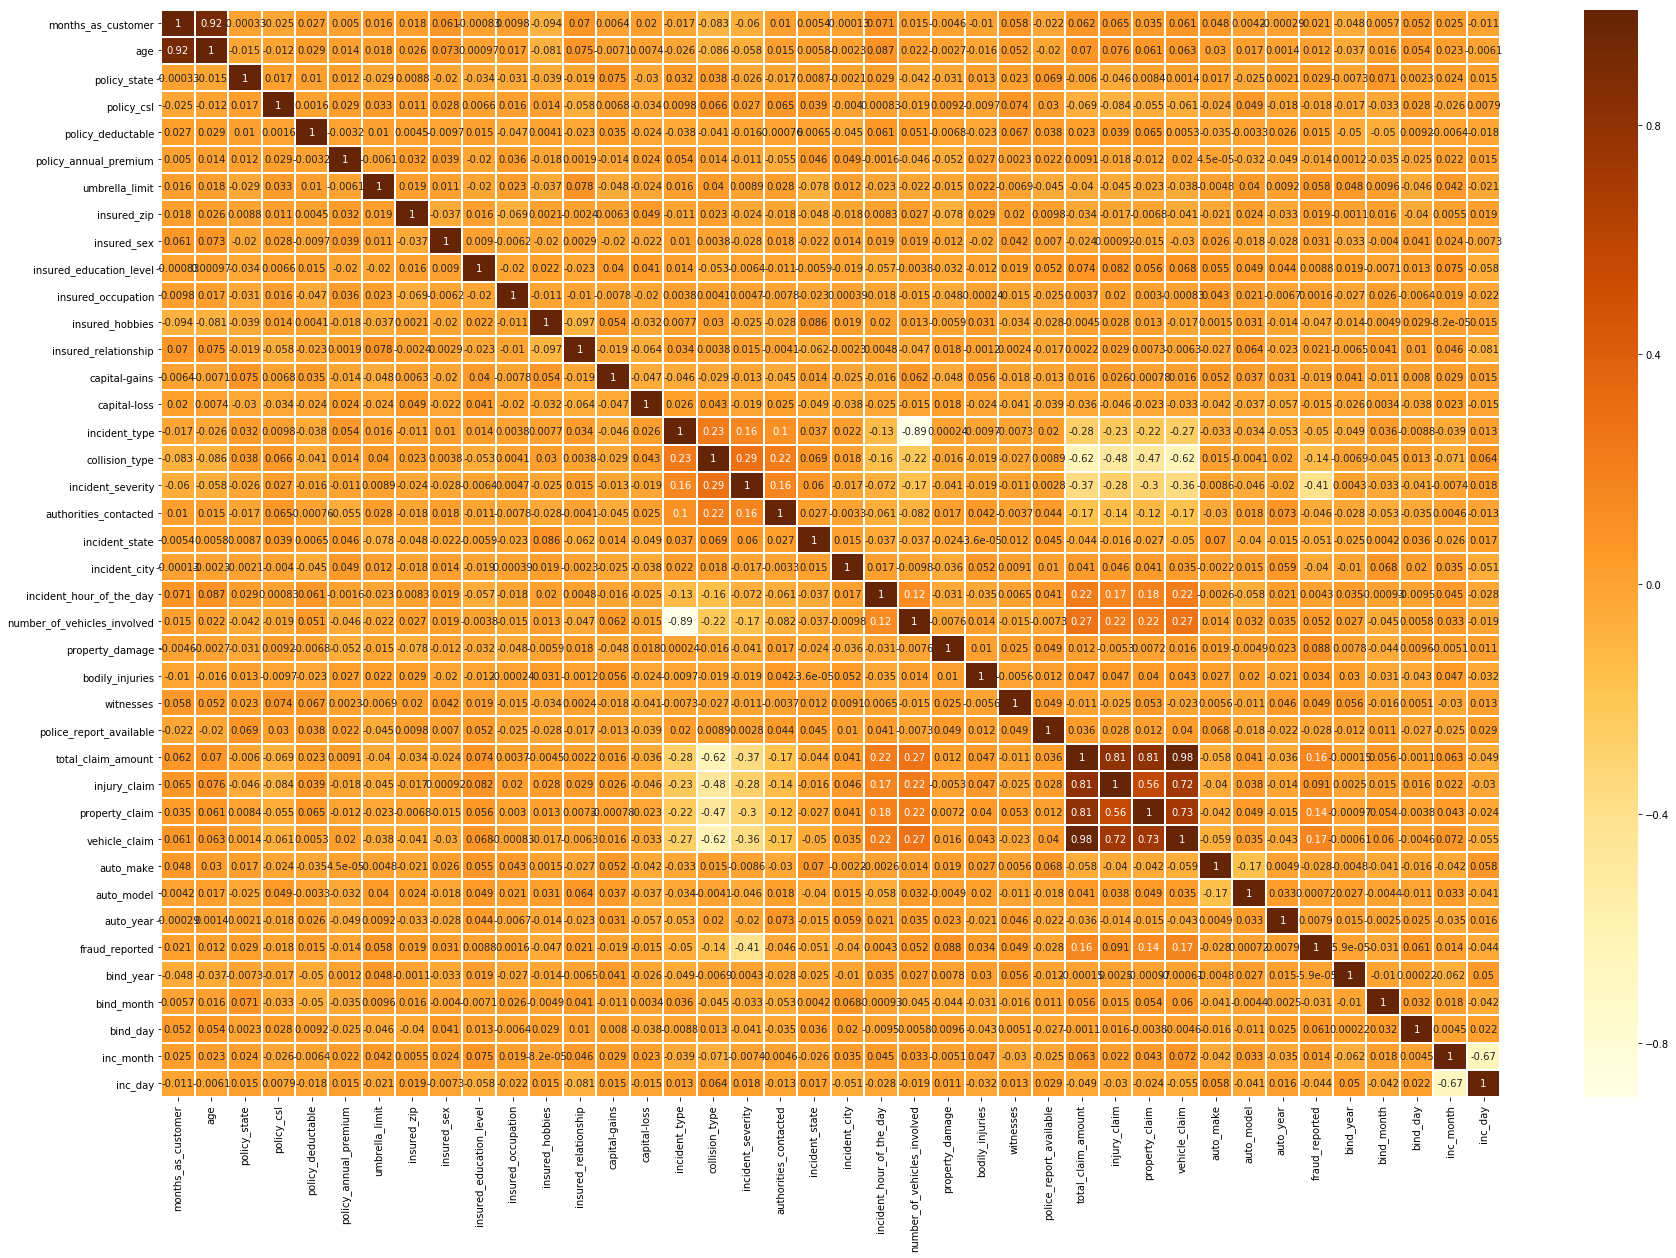

In [117]:
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths= 1, cmap  = 'YlOrBr')

### I can see that there is multi-collinearity issue with some of the variable like age and months as customers. 

### I can also see there is the same issue forthe columns like claim amounts (total, injury, property, vehicle)

### Also there is high negative correlation with the columns number of vehicles involved and incident type

#### We can remove these variables if the model doesn't give us desired results

### Checking for outliers

In [118]:
dataset.shape

(1000, 40)

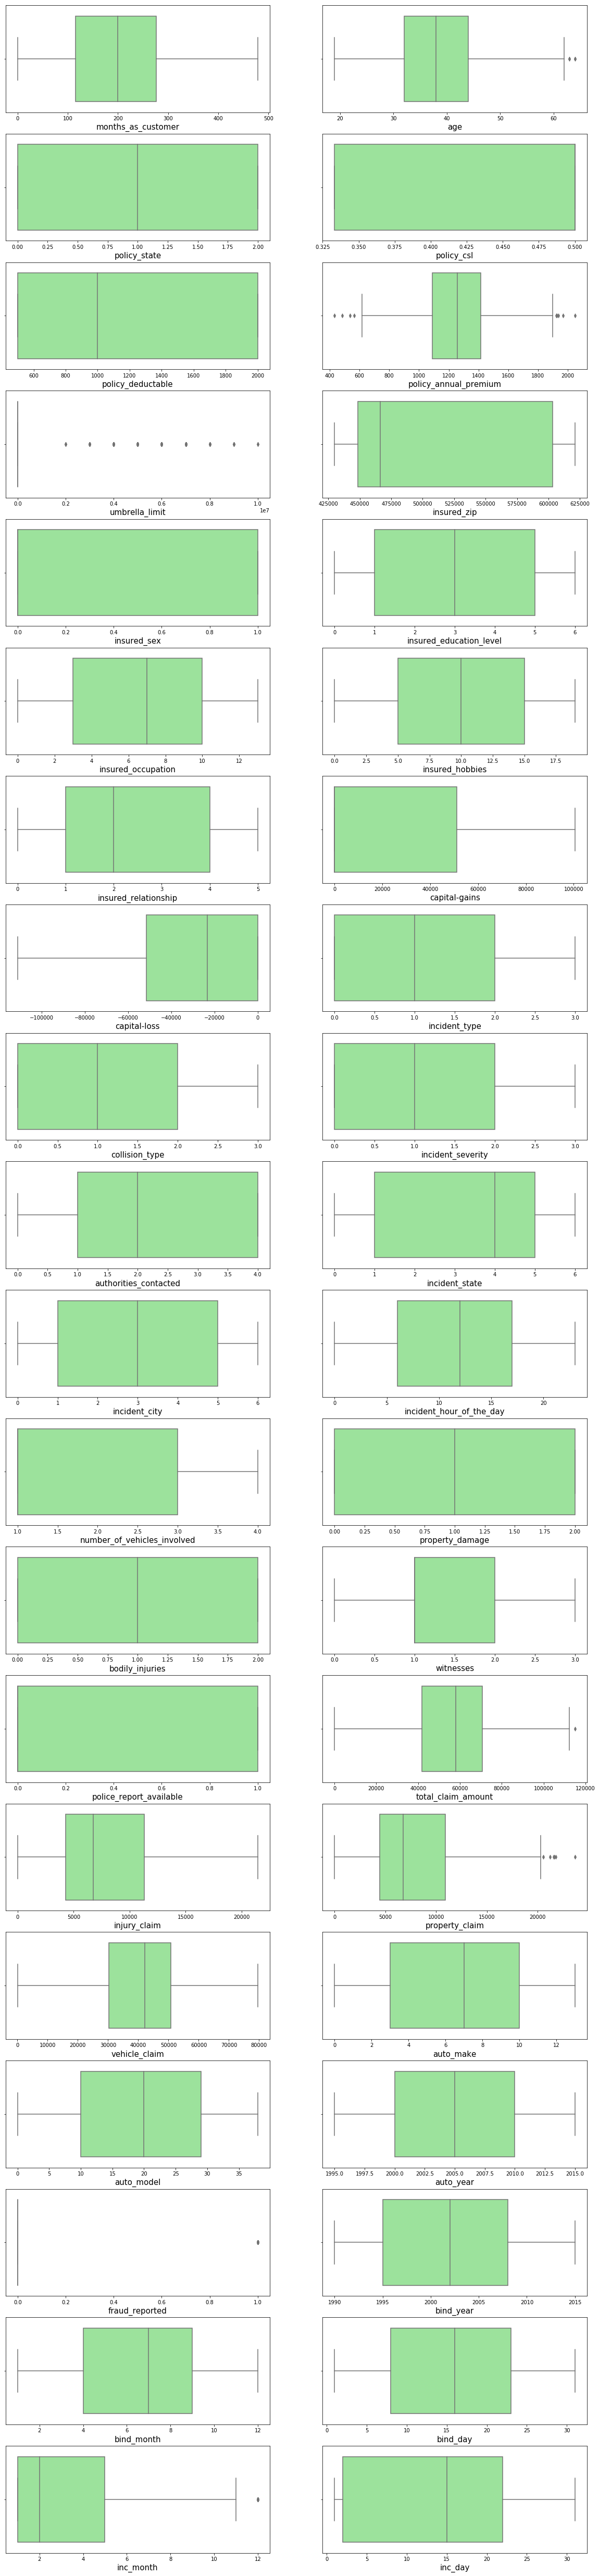

In [119]:
plt.figure(figsize = (20,90))
pltnum = 1

for i in dataset:
    if pltnum <=40:
        plt.subplot(20,2,pltnum)
        sns.boxplot(dataset[i],color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Upon reviewing, I can see that few continuous data columns has ouliers, Proceeding with the removal of the same

### Using zscore method to remove the outliers

In [120]:
from scipy.stats import zscore
z = np.abs(zscore(dataset[['age','policy_annual_premium','total_claim_amount','property_claim']]))
z

,age,policy_annual_premium,total_claim_amount,property_claim
0,0.990836,0.616705,0.714257,1.165505
1,0.334073,0.242521,1.807312,1.372696
2,1.088913,0.642233,0.686362,0.736072
3,0.224613,0.652886,0.403135,0.219722
4,0.552994,1.341980,1.753121,1.399654
...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817
996,0.224613,0.739141,2.111466,2.214794
997,0.541611,0.520739,0.558507,0.020826
998,2.523284,0.411866,0.219110,0.451976


In [121]:
data_new = dataset[(z<2.9).all(axis =1)]
print(data_new.shape)
print(dataset.shape)

(991, 40)
(1000, 40)


#### There is less than 1% data loss, proceeding with the removal

### Checking for distribution and Skewness in the dataset

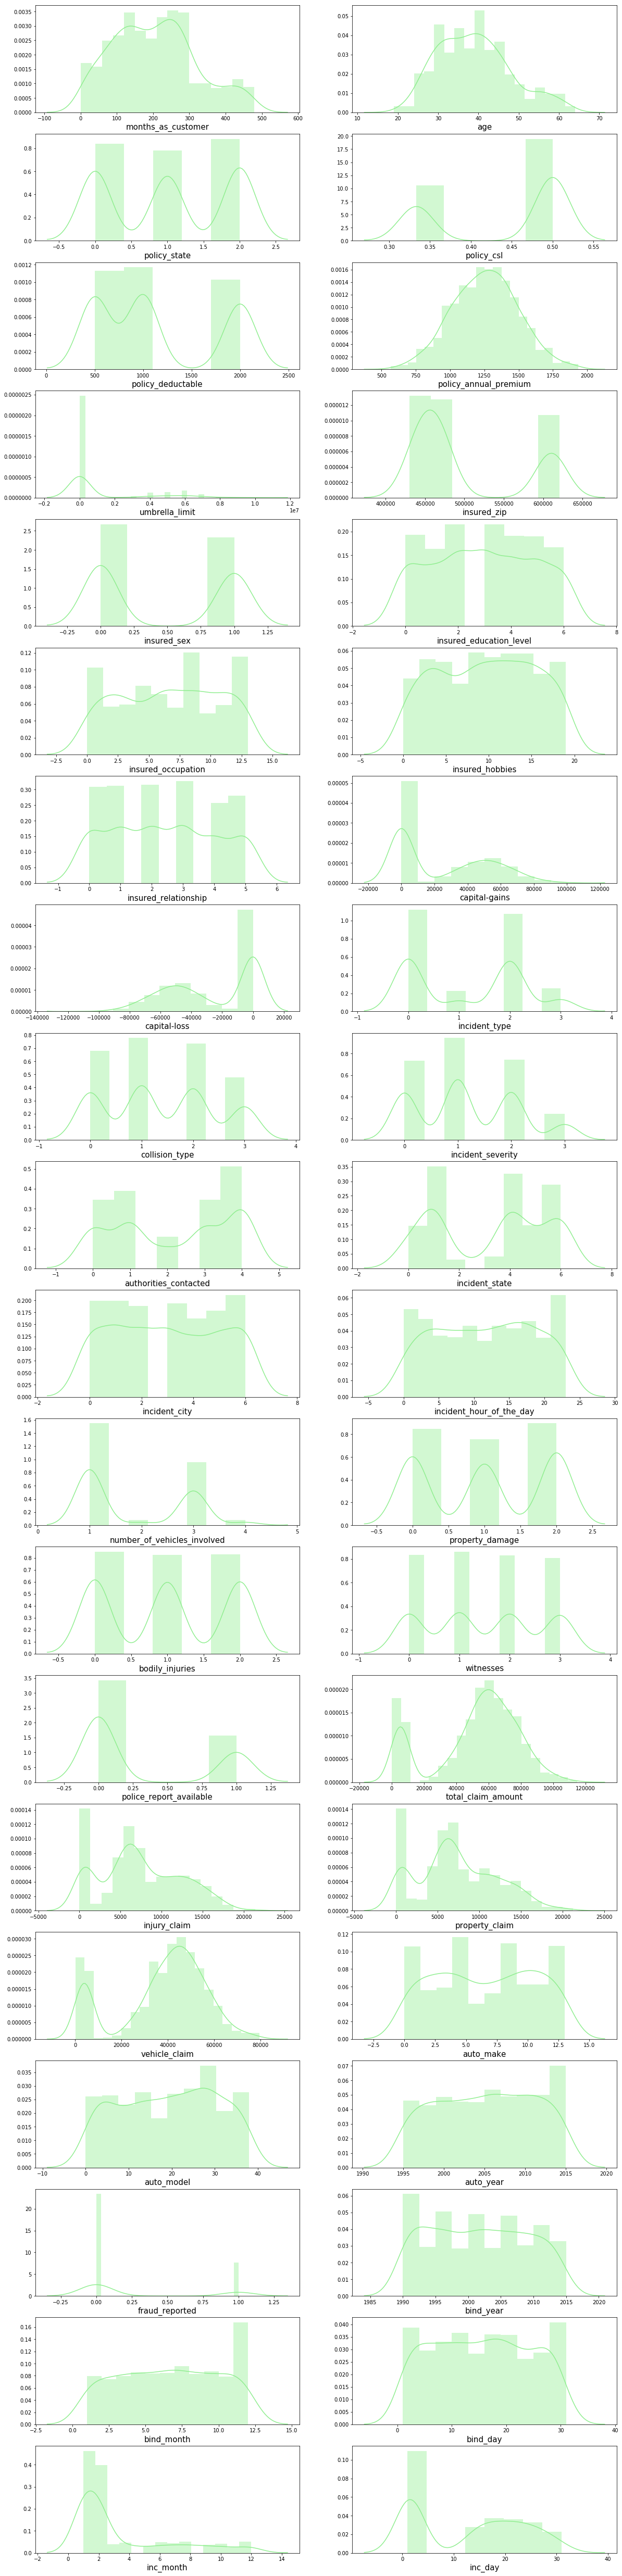

In [122]:
plt.figure(figsize = (20,90))
pltnum = 1

for i in data_new:
    if pltnum <=40:
        plt.subplot(20,2,pltnum)
        sns.distplot(data_new[i],color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

In [123]:
data_new.iloc[:,:20].describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,205.072654,39.011100,1.016145,0.441473,1138.748739,1257.893562,1.106963e+06,500855.152371,0.465187,2.964682,6.661958,9.690212,2.415742,25135.721493,-26703.229062,1.171544,1.378406,1.185671,2.167508,3.238143
std,114.952800,9.146887,0.829836,0.079596,612.308142,238.687971,2.301660e+06,71548.060655,0.499038,1.946705,4.015595,5.671112,1.684965,27930.259386,28033.792553,1.082850,1.049819,0.940576,1.533529,2.157860
min,0.000000,19.000000,0.000000,0.333333,500.000000,566.110000,0.000000e+00,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,32.000000,0.000000,0.333333,500.000000,1091.190000,0.000000e+00,448373.000000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51300.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,202.000000,38.000000,1.000000,0.500000,1000.000000,1257.830000,0.000000e+00,466303.000000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-22400.000000,1.000000,1.000000,1.000000,2.000000,4.000000
75%,277.500000,45.000000,2.000000,0.500000,2000.000000,1415.710000,0.000000e+00,603032.500000,1.000000,5.000000,10.000000,15.000000,4.000000,51100.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000
max,479.000000,64.000000,2.000000,0.500000,2000.000000,1935.850000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000


In [124]:
data_new.iloc[:,20:].describe()

,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_year,bind_month,bind_day,inc_month,inc_day
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,2.977800,11.638749,1.840565,1.019173,0.990918,1.483350,0.313824,52588.284561,7419.636731,7337.598385,37831.049445,6.549950,19.336024,2005.128153,0.246216,2001.588295,6.559031,15.437941,3.409687,13.092836
std,2.042357,6.938159,1.019412,0.835232,0.819533,1.111681,0.464280,26324.645154,4885.295321,4742.125411,18861.116319,4.040362,11.152529,6.008641,0.431023,7.377144,3.395525,8.853347,3.274583,10.443666
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1990.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,6.000000,1.000000,0.000000,0.000000,0.500000,0.000000,41695.000000,4275.000000,4425.000000,30200.000000,3.000000,10.000000,2000.000000,0.000000,1995.000000,4.000000,8.000000,1.000000,2.000000
50%,3.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,57900.000000,6750.000000,6730.000000,42080.000000,7.000000,20.000000,2005.000000,0.000000,2002.000000,7.000000,16.000000,2.000000,15.000000
75%,5.000000,17.000000,3.000000,2.000000,2.000000,2.000000,1.000000,70400.000000,11290.000000,10840.000000,50700.000000,10.000000,29.000000,2010.000000,0.000000,2008.000000,9.000000,23.000000,5.000000,22.000000
max,6.000000,23.000000,4.000000,2.000000,2.000000,3.000000,1.000000,114920.000000,21450.000000,21240.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,2015.000000,12.000000,31.000000,12.000000,31.000000


### Post Skewness check I can see that the features total claim and injury claim has little skewness in data. Hence applying the transformation technique on the same

In [125]:
data_new.skew()

months_as_customer             0.353514
age                            0.469218
policy_state                  -0.030154
policy_csl                    -0.624576
policy_deductable              0.470559
policy_annual_premium          0.031309
umbrella_limit                 1.801919
insured_zip                    0.828679
insured_sex                    0.139804
insured_education_level        0.003643
insured_occupation            -0.062391
insured_hobbies               -0.054021
insured_relationship           0.075575
capital-gains                  0.479243
capital-loss                  -0.394961
incident_type                  0.104899
collision_type                 0.126555
incident_severity              0.279524
authorities_contacted         -0.123101
incident_state                -0.144326
incident_city                  0.045032
incident_hour_of_the_day      -0.035909
number_of_vehicles_involved    0.500734
property_damage               -0.036011
bodily_injuries                0.016764


### Splitting the dataset before scaling and transforming

In [126]:
x = data_new.drop(columns = 'fraud_reported')
y = data_new['fraud_reported']

### Scaling the data using Min Max scaler due to presence of lot of ordinal data

In [127]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
sc_data = scal.fit_transform(x)
x = pd.DataFrame(sc_data, columns = x.columns)

### Applying the Power Transformation technique

In [130]:
tr_data = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr_data, columns = x.columns)

### Checking for skewness again

In [131]:
x.skew()

months_as_customer             0.001537
age                            0.011712
policy_state                  -0.097645
policy_csl                    -0.624576
policy_deductable              0.106809
policy_annual_premium         -0.005821
umbrella_limit                 1.490112
insured_zip                    0.371248
insured_sex                    0.139804
insured_education_level       -0.065955
insured_occupation            -0.080092
insured_hobbies               -0.073981
insured_relationship          -0.050974
capital-gains                  0.215155
capital-loss                  -0.223412
incident_type                 -0.022108
collision_type                -0.041723
incident_severity             -0.008841
authorities_contacted         -0.129871
incident_state                -0.133808
incident_city                 -0.058745
incident_hour_of_the_day      -0.071049
number_of_vehicles_involved    0.365482
property_damage               -0.100174
bodily_injuries               -0.078203


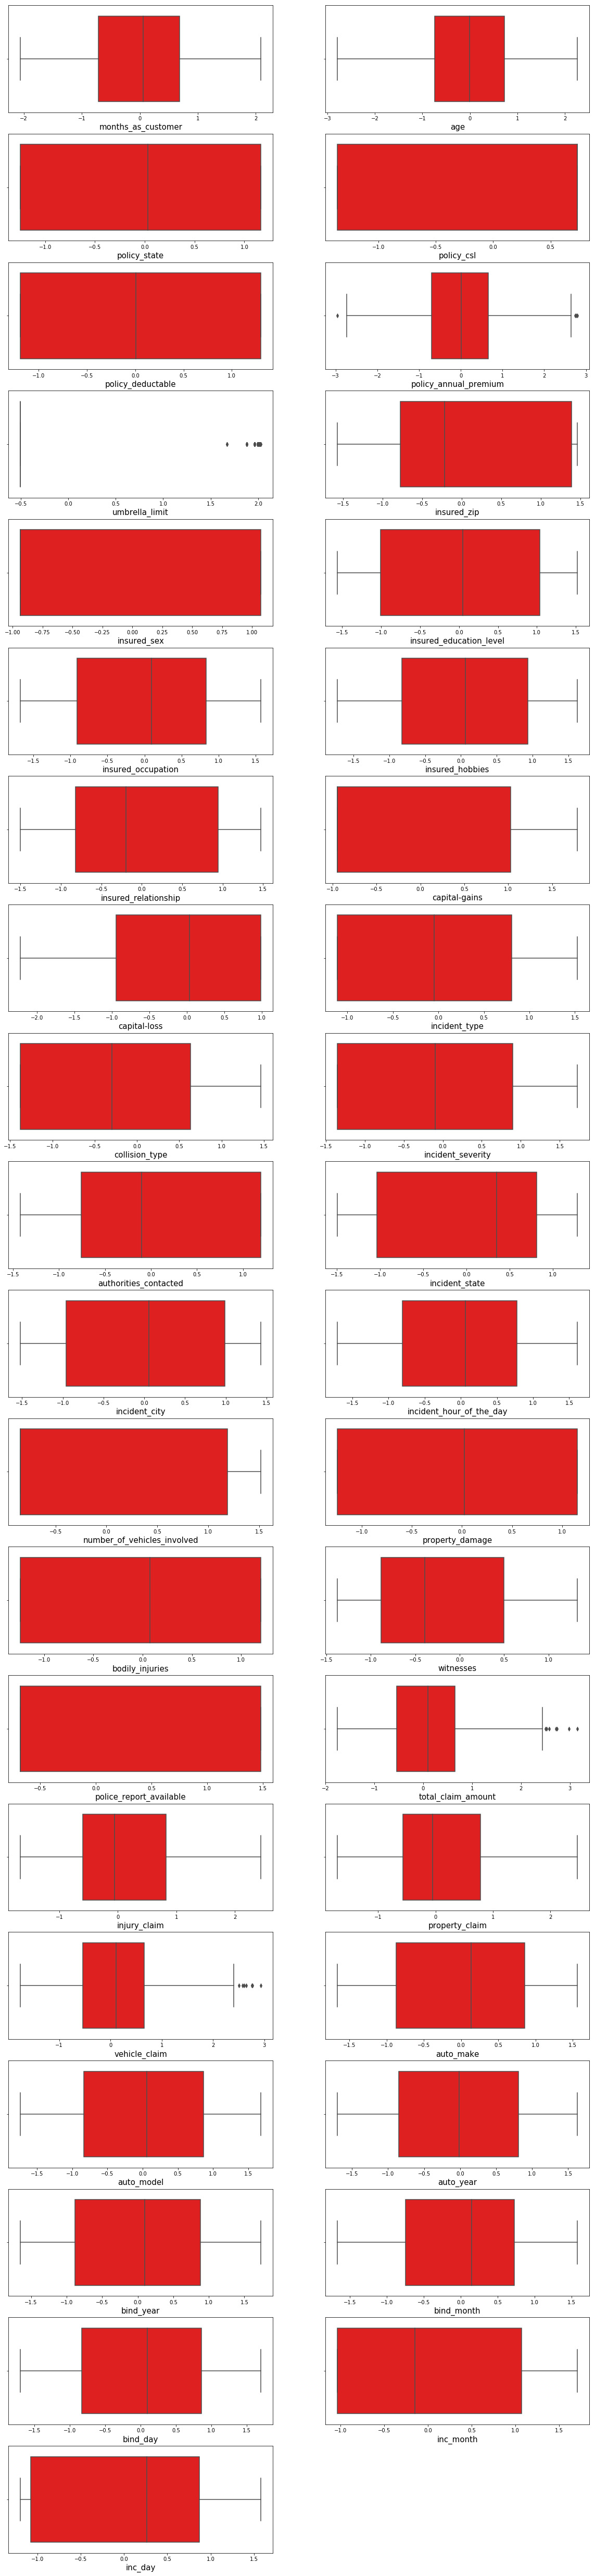

In [132]:
plt.figure(figsize = (20,90))
pltnum = 1

for i in x:
    if pltnum <=40:
        plt.subplot(20,2,pltnum)
        sns.boxplot(x[i],color = 'red')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Upon reviewing the above and below plots I can conclude that the outliers and skewness are brought to control 

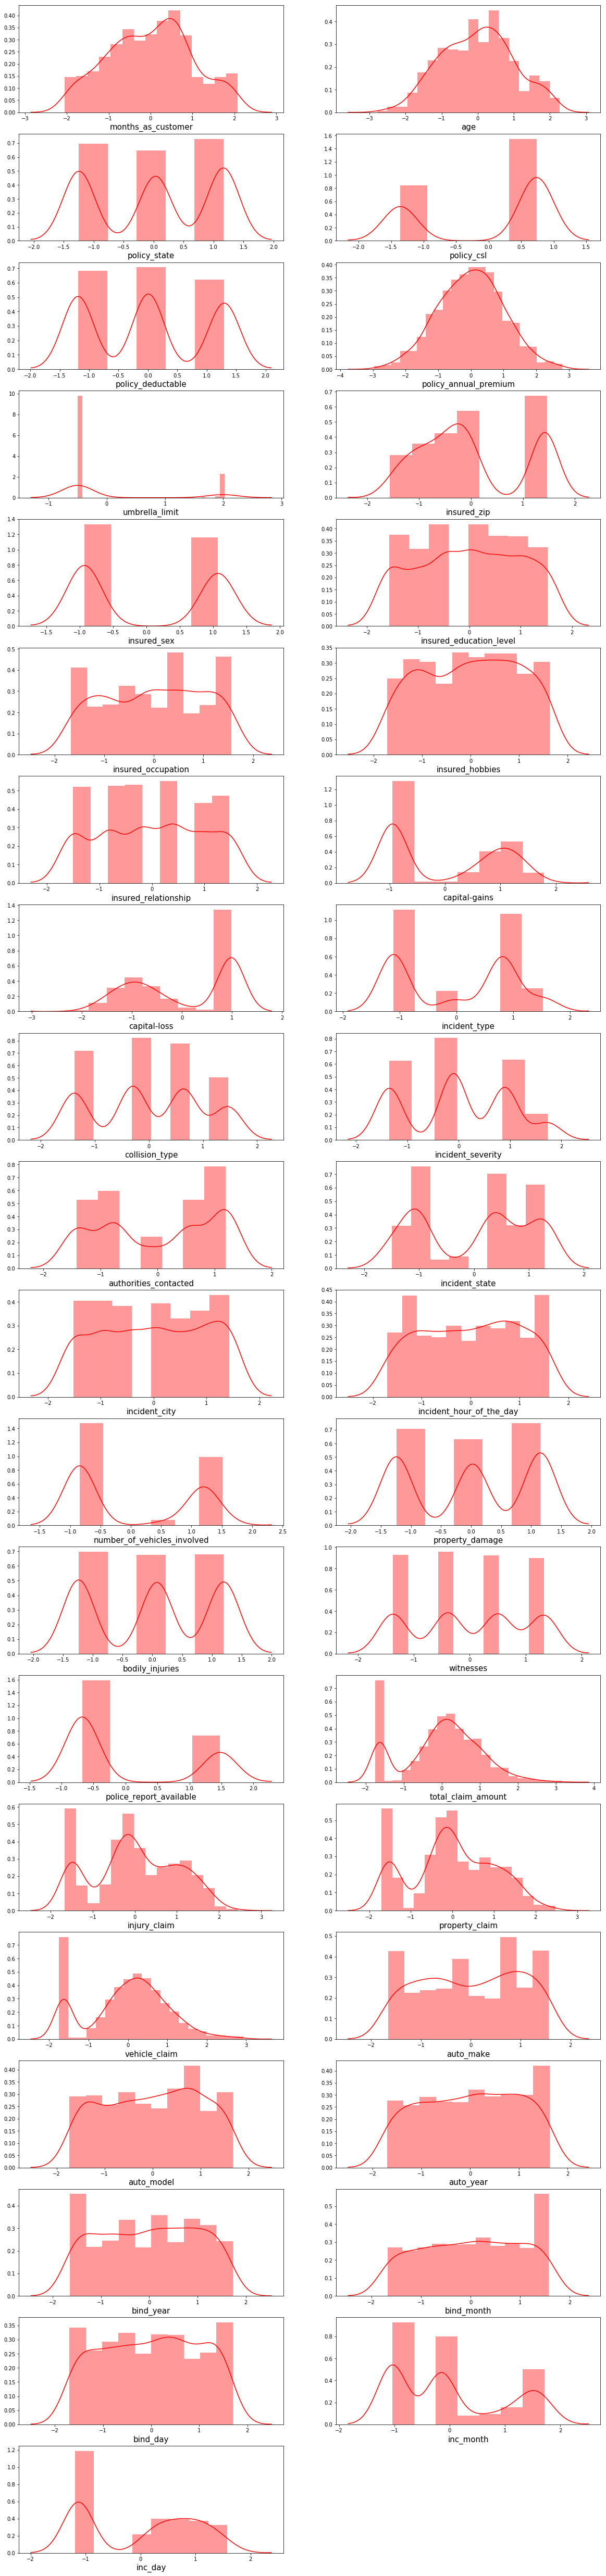

In [133]:
plt.figure(figsize = (20,90))
pltnum = 1

for i in x:
    if pltnum <=40:
        plt.subplot(20,2,pltnum)
        sns.distplot(x[i],color = 'red')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Checking for class imbalance

In [134]:
y.value_counts()

0    747
1    244
Name: fraud_reported, dtype: int64

### There is a class imbalance, hence using SMOTE over sampling method to fix the imbalance issue

In [135]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

### Now that we have fixed the class imbalance issue, let's proceed with the model building.

#### Finding the best random state and splitting the data to train and test

### Dropping the unnecessary column too many categories

In [140]:
x = x.drop(columns = 'insured_zip')

In [141]:
from sklearn.linear_model import LogisticRegression
brs = 0
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>brs:
            brs = i
print('the best random state for the data set is', brs)

the best random state for the data set is 2901


In [142]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = brs)

## Model 1: Logistic Regression

In [143]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
print('The Accuracy score for the Logistic Regression is' , lg_score)

The Accuracy score for the Logistic Regression is 0.7591093117408907


## Model 2: Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = accuracy_score(y_test, rf_pred)
print('The Accuracy score for the Random Forest Classifier is' , rf_score)

The Accuracy score for the Random Forest Classifier is 0.8825910931174089


## Model 3: XGB Classifier

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
print('The Accuracy score for the XG Boost Classifier is' , xgb_score)

The Accuracy score for the XG Boost Classifier is 0.9008097165991903


## Model 4: K-Neighbors Classifier

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_pred)
print('The Accuracy score for the KNeigbhors Classifier is' , knn_score)

The Accuracy score for the KNeigbhors Classifier is 0.6255060728744939


## Model 5: Extra Trees Classifier

In [147]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
print('The Accuracy score for the Extra Trees Classifier is' , et_score)

The Accuracy score for the Extra Trees Classifier is 0.9089068825910931


### Checking for outliers using the cross val score

In [149]:
cv = cross_val_score(lg,x_over,y_over, cv =7)
cv = cv.mean()
cv

0.7443132314134026

In [150]:
cv1 = cross_val_score(rf,x_over,y_over, cv =7)
cv1 = cv1.mean()
cv1

0.8830208666328188

In [151]:
cv2 = cross_val_score(xgb,x_over,y_over, cv =7)
cv2 = cv2.mean()
cv2

0.891019011263845

In [152]:
cv3 = cross_val_score(knn,x_over,y_over, cv =7)
cv3 = cv3.mean()
cv3

0.651989820543197

In [153]:
cv4 = cross_val_score(et,x_over,y_over, cv =7)
cv4 = cv4.mean()
cv4

0.9144148379372811

### Finding the best model

In [154]:
mod_sc = [lg_score, rf_score, xgb_score, knn_score, et_score]
cross = [cv,cv1,cv2,cv3,cv4]
best_model = pd.DataFrame({})
best_model['mod_sc'] = mod_sc
best_model['cross'] = cross
best_model['Difference'] = best_model['mod_sc'] - best_model['cross']
best_model

,mod_sc,cross,Difference
0,0.759109,0.744313,0.014796
1,0.882591,0.883021,-0.000430
2,0.900810,0.891019,0.009791
3,0.625506,0.651990,-0.026484
4,0.908907,0.914415,-0.005508


### From the above scores, we can see that the Extra Trees model is the best model for the dataset because it is reaching upto 0.91 score

### Proceeding with hyper-parameter Tuning

In [168]:
params = {'n_estimators':[100,150,200,250],
         'criterion':['gini','entropy'],
         'max_depth':[8,12,14,16],
         'min_samples_split':[3,5,7,9],
         'bootstrap':[True,False]}

In [169]:
gscv = GridSearchCV(ExtraTreesClassifier(),params,cv =5, n_jobs = -1)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 14, 16],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250]})

### Finding the best parameters from Grid Search

In [170]:
gscv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 200}

### Fitting the final model

In [171]:
fnl_mod = ExtraTreesClassifier(bootstrap = False,criterion = 'gini',max_depth = 16,
                              min_samples_split = 3, n_estimators = 200, n_jobs = -1)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = accuracy_score(y_test,fnl_pred)
print('The Accuracy score for the Tuned Extra Trees Classifier is' , fnl_score)

The Accuracy score for the Tuned Extra Trees Classifier is 0.917004048582996


### Upon review, I can say that we have imroved the score using hyper parameter tuning. Below is the classification report

In [172]:
print(classification_report(y_test,fnl_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       250
           1       0.91      0.93      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



## The F1 Score of the model is 0.92, which is balanced. let's proceed with AUC ROC Score

In [173]:
print(roc_auc_score(y_test, fnl_pred))

0.9171147540983607


### Plotting the ROC Curve

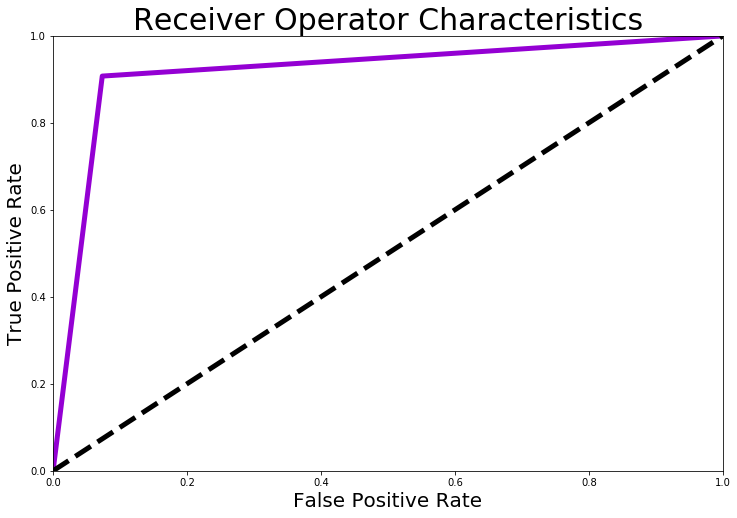

In [175]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(fnl_pred, y_test)
auc_roc = auc(fpr,tpr)

plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, lw = 5 ,color = 'darkviolet',label = 'ROC Curve(area = %0.2f)'%auc_roc)
plt.plot([0,1],[0,1], lw= 5, color = 'black', linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate', fontsize = 20 )
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver Operator Characteristics', fontsize = 30)
plt.show()

### Saving the model

In [176]:
import joblib
joblib.dump(fnl_mod,' Fraud_Detectoin.pkl')

[' Fraud_Detectoin.pkl']